<h2>SNA of Bollywood Films - Phase 1: The Dataset and Statistical Overview</h2>

Think of 6 Degrees of Kevin Bacon -- only this time, it's a social network analysis (SNA) of the actors and directors of Bollywood films of the last 50 years from 1970-2018 (the 'modern era'). This project is a reincarnation and expansion of an earlier project that was part of a tutorial and workshop on social network analysis (SNA) that I conducted at HICSS-47 (2014). That tutorial looked at social networks in Bollywood movies for all the Bollywood films from 2008-2013. The slides from that earlier tutorial are provided here for reference. This current rendition expands the sample from 6 years of films to the 49 years of films from 1970 to 2018.

\[note: from this point forward will either refer to the 49 years as ~50 years or 1970 to the present.\]

The genesis of my initial work, as well as this expansion, is found not only in the simple games, applications, and research revolving around the "Six Degrees of Kevin Bacon" (based on Hollywood films), but also the larger body of SNA including the concepts of degrees of separation, clustering, and small world networks:

<ul>
<li><a href="https://en.wikipedia.org/wiki/Six_Degrees_of_Kevin_Bacon">Six Degrees of Kevin Bacon</a></li>
<li><a href="https://oracleofbacon.org/center.php">The Center of the Hollywood Universe</a></li>
<li><a href="https://en.wikipedia.org/wiki/Small-world_network">Small-world Networks</a></li>
</ul>

The project involves three intertwined phases. The first phase focuses on the creation of the data set on which the SNA analysis is based along with a statistical overview of the data set including an analysis of the survival rates of directors, actors and genre. The second phase is devoted to a SNA of this dataset -- looking primarily at who works with whom and who the key players are from a SNA perspective. Finally, the third phase combines this data with another data set based on 'Hindi Film Families' in order to look at the participation and influence of these families in Bollywood films. The analysis in all 3 phases is housed in 3 separate Jupyter iPython notebooks.

<ol>
    <li>SNA of Bollywood Films - Phase 1: The Dataset and Statistical Overview</li>
    <li>SNA of Bollywood Films - Phase 2: Participation and Influence of Directors and Actors</li>
    <li>SNA of Bollywood Films - Phase 3: The Role of Film Families in Bollywood</li>
</ol>

<h3><a class="anchor" id="toc">Table of Contents</a></h3>

1. <a href='#intro'>Introduction</a><br>
2. <a href='#dataset'>Constructing the Data Set</a><br>
3. <a href='#dataframe'>Transforming the Excel Data Set into a Dataframe</a><br>
   <a href='#df_structure'>General Structure of the BollywoodDF Dataframe</a><br>
   <a href='#df_contents'>General Cell contents of the BollywoodDF Dataframe</a><br>
4. <a href='#stat_overview'>Statistical Overview</a><br>
   <a href='#num_movies_year'>Number of Movies by Year</a><br>
   <a href='#num_dirs_cast_genre_year'>Number of Directors, Cast and Genre per Year</a><br>
   --   <a href='#using_findall'>Using Findall to Analyze Director, Cast and Genre Counts</a><br>
   --   <a href='#describe'>Describing Director, Cast and Genre Counts</a><br>
   <a href='#longitudinal'>Longitudinal Analysis of the Number of Directosr, Cast Members and Genre</a><br>
   <a href='#most_active_dirs_cast_genre'>Most Active Directors, Headline Cast Members, and Genre</a><br>
   --   <a href='#dictionary'>Creating a Python Dictionary from Bollywood Dataframe</a><br>
   --   <a href='#analyze_individual'>Analyzing Individual Directors, Cast Members and Genre Counts: Python Counters</a><br>
   --   <a href='#skewed_distribution'>Skewed Distributions for Ranked Listings of Directors, Cast Members and Genre
 </a><br>
   --   <a href='#dictionary_longitudinal_individuals'>Creating a Dictionary for Longitudinal Analysis of Individual Entity Counts and Rankings</a><br>
 <a href='#individual_entities'>Patterns of Interest in Individual Directors, Cast Members and Genre</a><br>
   --   <a href='#view_top'>View from the Top: How Many Movies and How Many Years?</a><br>
   --   <a href='#top_directors'>Analysis of 'Top' Individual Directors</a><br>
   --   <a href='#top_cast'>Analysis of 'Top' Individual Starring Cast Members</a><br>
   --   <a href='#top_genre'>Analysis of 'Top' Individual Genre</a><br>
5. <a href='#lifespan'>Analyzing the 'Lifespan' of Directors, Cast Members, and Genre</a><br>
   --   <a href='#data_setup'>Setting up the Data for Estimating Survival Rates</a><br>
   --   <a href='#estimating_analyzing'>Estimating and Analyzing the Survival Functions and Probabilities for Directors, Starring Cast, and Genre</a><br>
   --   <a href='#fitting_directors'>Lifespan of Directors: Fitting and Estimation</a><br>
   --   <a href='#discussing_directors'>Lifespan of Directors: Results and Discussion of Fitting and Estimation</a><br>
   --   <a href='#fitting_cast'>Lifespan of Starring Cast: Fitting and Estimation</a><br>
   --   <a href='#discussing_cast'>Lifespan of Starring Cast: Results and Discussion of Fitting and Estimation</a><br>
   --   <a href='#fitting_genre'>Lifespan of Genre: Fitting and Estimation</a><br>
   --   <a href='#discussing_genre'>Lifespan of Genre: Results and Discussion of Fitting and Estimation</a><br>
6. <a href='#closing'>Closing Comments and Next Phase</a><br></a><br>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

<a id='dataset'></a>

<h3>Constructing the Data Set</h3>
<a href='#toc'>Return to TOC</a>

The foundation for the data set comes from a wikipedia page indexing the <a href="https://en.wikipedia.org/wiki/Lists_of_Bollywood_films">Lists of Bollywood Films</a> for the years from 1940 to 2018. For the moment, I'm leaving the earlier years from 1940-1969 for future analysis, primarily because it is extremely labor intensive working with the wide variety of data formats, missing data, and errors found in even smaller subsets of the films in these lists. \[Note: the IMDB data sets provide info about Bollywood films and actors, but it is not as comprehensive as the lists provided in Wikipedia.]

Each entry in the <i>Lists</i> designates a link to a wikipedia page devoted to the Bollywood films for a single year. The structure of all the links is simple (e.g. the link for 2018 is wikipedia.org/wiki/List_of_Bollywood_films_of_2018). This makes it straightforward to write a program to download each of the 50 pages in this sample, which is what I did -- see the Python (3.+) program in this repository labeled <a href='https://github.com/daveking63/Six-Degrees-of-Bollywood/blob/master/retrieveListofBollywoodFilmsbyYear.py'><i>retrieveListofBollywoodFilmsbyYear.py</i></a>. Once the pages were downloaded, they were each stored in a local (HTML) file for further analysis.

Each of the downloaded webpages contains an HTML table of information about each of the films produced with in a given year. While the structure and content of the pages and tables varied from one decade, and often one year, to the next, all of the tables provided information about the following for each film:

<ul>
  <li>year of release</li>
  <li>title</li>
  <li>HTML link to a wikipedia page devoted to that title</li>
  <li>director(s) (one or more)</li>
  <li>cast (i.e. list of actors names in the film)</li>
  <li>genre(s) (one or more tags denoting the type of movie, e.g. Romance, Drama, Comedy, etc.)</li>
</ul>

Again, a program -- <a href='https://github.com/daveking63/Six-Degrees-of-Bollywood/blob/master/bollySetUp-HTMLLists.py'><i>bollySetUp-HTMLLists.py</i></a> -- was used to extract the rows from each of the 50 tables and to create a single, consolidated table for all of the films from all of the years. A quick look at this Python 3 program will reveal that it employs a small set of functions based on Beautiful Soup package along with a number of simple text and regular expression "re" function calls. In the program, the title and it's associated page link are defined as strings, while the director, cast and genre variables are all Python lists because they contain 0 or more entries.  At the moment, the results are stored row-by-row in an Excel file whose name is <a href='https://github.com/daveking63/Six-Degrees-of-Bollywood/blob/master/bollywoodData.xlsx'><i>bollywoodData.xlsx</i></a>).

\[note: One of the problems with the current set is that there are a number of missing directors names for a series of years. There are a couple of ways to address this:
<ul>
<li>Wikipedia Links: Download all the wikipedia links/pages provided in the original Bollywood yearly lists. Although they aren't necessarily uniform from movie to movie, for many of them it may be straightforward to access the missing directors and casts.</li>
<li>IMDB Database: The IMDB database has data on Indian movies of all languages. I haven't check yet, but much of the missing info may be included.</li>
</ul>

Regardless, I'll probably look into both of these possibilities sometime in the near future, assuming this analysis yields some interesting results.\]

 <a id='dataframe'></a>

<h3>Transforming the Excel data set into a Dataframe</h3>
<a href='#toc'>Return to TOC</a>

Given that the data is in an .xlsx file, one of the first steps in producing a statistical overview of the data is to read the file with the pandas 'read_excel' method or function which transforms the file into a pandas 'dataframe'.

Note: While the file could have been read and transformed it into a variety of formats, the pandas dataframe was chosen primarily because of it's built-in analytical capabilities (for a summary of these, see <a href="https://github.com/daveking63/Jupyter-iPython-Notebooks"> <i>Pandas Notes</i></a> - a Python notebook provided in one of my other repositories).

In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt

# read bollywoodData.xlsx transforming it to a pandas dataframe
bollywoodPath = "c:/Research/Bollywood/"
bollywoodXLFile = bollywoodPath + "bollywoodData.xlsx"
bollywoodDF = pd.read_excel(bollywoodXLFile, sheet_name="bollywoodData")
print('Type of bollywoodDF:',type(bollywoodDF))


Type of bollywoodDF: <class 'pandas.core.frame.DataFrame'>


<a id = 'df_structure'></a>

<h4>General Structure of the BollywoodDF DataFrame</h4>
<a href='#toc'>Return to TOC</a>

It's easy to get a general sense of the dataframe's structure by making a few simple calls including - size, shape, column names and types, row index - and by viewing the contents of some of it's cells. 

In [4]:
# Dimensional Structure

print("1. Number of dimensions: bollywoodDF.ndim", bollywoodDF.ndim)
print()
print("2. Number of elements in each dimension: bollywoodDF.shape", bollywoodDF.shape)
print("")
print("3. Range of row numbers: bollywoodDF.index:")
print("")
print(bollywoodDF.index)
print("")
print("4. Names of columns: bollywoodDF.columns:")
print("")
print(bollywoodDF.columns)
print("")
print("5. Size -- number of elements (rows x columns): bollywoodDF.size", bollywoodDF.size)
print("")
print("6. Info about row index and column names and types and : bollywoodDF.info()")
print("")
print(bollywoodDF.info())

1. Number of dimensions: bollywoodDF.ndim 2

2. Number of elements in each dimension: bollywoodDF.shape (4908, 10)

3. Range of row numbers: bollywoodDF.index:

RangeIndex(start=0, stop=4908, step=1)

4. Names of columns: bollywoodDF.columns:

Index(['_id', 'movieID', 'movieTitle', 'movieYear', 'movie5Year', 'movieLink',
       'movieDirector', 'movieCast', 'movieGenre', 'count'],
      dtype='object')

5. Size -- number of elements (rows x columns): bollywoodDF.size 49080

6. Info about row index and column names and types and : bollywoodDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 10 columns):
_id              4908 non-null int64
movieID          4908 non-null object
movieTitle       4908 non-null object
movieYear        4908 non-null int64
movie5Year       4908 non-null int64
movieLink        4154 non-null object
movieDirector    4126 non-null object
movieCast        4540 non-null object
movieGenre       3572 non-null objec

Based on this information, it's clear that it's a two dimensional dataframe (rows x columns). There are 4908 rows and 9 columns in the dataframe.  The row index indicates that they are numbered from 0 to 4907. The 9 column names were taken from the header row in the Excel table and include:

    _id, movieID, movieTitle, movieYear, movieLink, 
    movieDirector, movieCast, movieGenre, and count
    
The combination of 4908 rows and 9 columns results in 44172 cells.

In addition to the column names, the 'dataframe.info()' method or function also provides details about the column types. As shown, there were 3 columns containing integers and 6 columns containing 'objects' which were all 'strings'. The 'info' method also provides the number of non-null cells by column. So, for instance, while there are 4908 cells in each column, in the 'movieLink' column only 4154 of them have non-null values. The other 754 cells had 'null' or missing values.

While the column names and types provide some hints about the contents of the cells in a particular column, the only way to really understand the contents is to look at a few rows in the dataframe.  This is easily done the 'head' and 'tail' methods.  The 'head' method displays rows at the top, while the 'tail' displays rows at the bottom.  By default 5 rows are displayed, but you can designate more or less. For instance head(10) would display 10 rows.

<a id = 'df_contents'></a>

<h4>General Cell Contents of the BollywoodDF DataFrame</h4>
<a href='#toc'>Return to TOC</a>

In [5]:
print("General Cell and Row Contents of bollywoodDF:")
print("")
print("First 5 rows of the dataframe: bollywoodDF.head()")
print("")
print(bollywoodDF.head())
print("")
print("Last 5 rows of the dataframe: bollywoodDF.tail()")
print("")
print(bollywoodDF.tail())

General Cell and Row Contents of bollywoodDF:

First 5 rows of the dataframe: bollywoodDF.head()

   _id movieID         movieTitle  movieYear  movie5Year  \
0    0  1970-0       Aag Aur Daag       1970        1970   
1    1  1970-1     Aan Milo Sajna       1970        1970   
2    2  1970-2  Aansoo Aur Muskan       1970        1970   
3    3  1970-3          Abhinetri       1970        1970   
4    4  1970-4            Bachpan       1970        1970   

                 movieLink        movieDirector  \
0       /wiki/Aag_Aur_Daag            A. Salaam   
1     /wiki/Aan_Milo_Sajna           Mukul Dutt   
2  /wiki/Aansoo_Aur_Muskan          P. Madhavan   
3          /wiki/Abhinetri     Subodh Mukherjee   
4            /wiki/Bachpan  Kotayya Pratyagatma   

                                 movieCast movieGenre  count  
0                 Joy Mukherjee|Madan Puri     Action      1  
1   Asha Parekh|Rajesh Khanna|Vinod Khanna      Drama      1  
2                            Bindu|Padmini   

With one exception (missing values), the 'heads's and 'tail's methods provide a pretty good understanding of the types of data in the various columns and cells:

<ol>
    <li>_id -- this is a numerical 'id' used to indicate the ordered position of the row (i.e. movie) in the dataframe. Because it is unique, it can be used by other programs as a 'hashed' index. My choice of this particular label ('\_id') was purposeful because this is the label that the 'document-database' MongoDB searches for when it tries to construct an index for a 'collection' of documents (see the notebook <a href="https://github.com/daveking63/Jupyter-iPython-Notebooks/blob/master/SemiStructuredData_PythonDicts_JSON_MongoDB_PyMongo.ipynb">Working with Semi-Structured Data: Python Dictionaries, JSON, MongoDB and PyMongo</a> in another of my repositories).</li>
    <li>movieID -- string indicating the position of the movie within a given year. Number starts at 0. For example, as shown the first movie (chronologically) in 1970 is 1970-0, the second 1970-1, etc.</li>
    <li>movieTitle -- title of the movie.</li>
    <li>movieYear -- number representing the year released.</li>
    <li>movie5Year -- number represent a the "lustrum" (5 year period) in which the movieYear falls (e.g. 1970 is in the interval 1970-74, 1981 in the interval 1980-85, and 1999 in the interval 1995-99). This column or field is used later in the analysis.
    <li>movieLink -- sting representing a link (usually) to wikipedia web page (complete link is prefaced by http://wikipedia/...).</li>
    <li>movieDirector -- string containing list of director names separated by a pipe '|'.</li>
    <li>movieCast -- string containing list of 'headline' cast member names separated by a pipe '|'. This list is usually only a small segment of the complete cast list. Creating a complete cast list would require downloading the associated 'movieLink' page and scraping the html for the complete list, something I'll leave for another day.</li>
    <li>movieGenre -- string containing list of genre names separated by a pipe '|'. As Wikipedia notes, "A film genre is a motion-picture category based  on similarities either in the narrative elements or in the emotional response to the film".</li>
    <li>count -- used programmatically as a quick way to compute total counts (often in other applications like Excel).</li>
</ol>

The pipe symbol '|', or some other unique symbol (e.g. double colons '::'), is often used to create a string representing a  concatenated list of entities. In this way, variables or fields whose values are lists of entities can be entered and stored in a table or spreadsheet (just like they were in the bollywoodData.xlsx spreadsheet). Of course, if a concatenated string of this sort is stored in a spreadsheet, then it wii have to be split programmatically before it can be used in virtually any kind of analysis. This is why, other formats and data structures (e.g. Python dictionaries) are preferable. However, for the time being we'll stick with the current dataframe and ignore the other options.

<a id='stat_overview'></a>

<h3>Statistical Overview</h3>
<a href='#toc'>Return to TOC</a>

In it's current form (with the 'piped' strings) there's not much to summarize statistically, except the movie count by year.

<a id='num_movies_year'></a>

<h4>Number of Movies by Year</h4>
<a href='#toc'>Return to TOC</a>

There are a variety of ways to determine how frequently particular values occur in a column. One straightforward method is pandas 'value_counts'. This is what is done with the 'movieYear' column. The results are sorted by year via the 'sort_index' method. Left unsorted, the order of the years can be unpredictable.

In [6]:
numberOfMoviesByYear = bollywoodDF.movieYear.value_counts().sort_index()

totMovies = numberOfMoviesByYear.sum()
print("total number of movies from 2017-2018:", totMovies)
print("mean number of movies per year - 1970-2018:", round(numberOfMoviesByYear.mean(),0))
print("mean number of movies per year - 1970-2004:", round(numberOfMoviesByYear[0:35].mean(),0))
print("mean number of movies per year - 2005-2018:", round(numberOfMoviesByYear[35:49].mean(),0))
print("")
print("Top 5 counts of movies by Year")
numberOfMoviesByYear.head(5)
print("")
print("Bottom 5  counts of movies by Year")
numberOfMoviesByYear.tail(5)
print("")
print("Statistical description of movieYear counts:")
numberOfMoviesByYear.describe()
print("")
numberOfMoviesByYear.plot(kind='line', title='Number of Movies by Year:')

total number of movies from 2017-2018: 4908
mean number of movies per year - 1970-2018: 100.0
mean number of movies per year - 1970-2004: 95.0
mean number of movies per year - 2005-2018: 113.0

Top 5 counts of movies by Year


1970    69
1971    85
1972    95
1973    74
1974    89
Name: movieYear, dtype: int64


Bottom 5  counts of movies by Year


2014    141
2015    113
2016    121
2017    120
2018    121
Name: movieYear, dtype: int64


Statistical description of movieYear counts:


count     49.000000
mean     100.163265
std       21.734522
min       39.000000
25%       85.000000
50%      102.000000
75%      116.000000
max      141.000000
Name: movieYear, dtype: float64

Looking at the 'line' plot of the counts, it's obvious that over the time period from 1970 to the present there's been substantial variability in the number of movies released per year. The mean number of releases for the ~50 year period was 100 movies per year with a standard deviation around 22 movies per year. The number of releases was at its lowest (39 movies) in 1986 and its highest (141 movies) in 2014. Within this variability, at least 3 patterns are discernible: (1) the number appears to seesaw back and forth every year or so; (2) there's an inflection point somewhere between 1995 and 2005; and (3) from 2005 to the present the mean number of movies released per year has increased, going from 95 movies per year before 2005 to 112 movies after 2005). Both the bottom point in the mid-80s to late-80s and the inflection point in the latter part of the 90s and early 2000s are well documented in various historial accounts of Bollywood:

>In the late 1980s, Hindi cinema experienced another period of stagnation, with a decline in box office turnout, due to increasing violence, decline in musical melodic quality, and rise in video piracy, leading to middle-class family audiences abandoning theaters...

>The 2000s saw a growth in Bollywood's recognition across the world due to a growing and prospering NRI and Desi communities overseas. A fast growth in the Indian economy and a demand for quality entertainment in this era, led the nation's film-making to new heights in terms of production values, cinematography and innovative story lines as well as technical advances in areas such as special effects and animation.

<a id='num_dirs_cast_genre_year'></a>

<h4>Number of Directors, Cast and Genre per Year</h4>
<a href='#toc'>Return to TOC</a>

In order to summarize the trends in the number of directors, starring cast members, and genre by year or any other factor, the 'piped' strings need to be either converted into a count or into individual elements that can be counted. If all we want to do is count the number of individual elements in the string, then we could use something like the 'findall' method found in the regular expressions ('re') library. Take, for instance, the cast represented by the string 'Parekh|Rajesh Khanna|Vinod Khanna'. If the 're.findall' method is applied to the string (see below), it will indicate that there are 2 'pipe' symbols in the string, implying that there are 3 cast members. If, however, the individual elements are needed for further analysis, then the string can be 'split' into a list of individual elements and saved for later use. The length of the list will provied the associated count. Both methods -- finall and split -- are demonstrated below.

In [7]:
import re

print("Using 're.findall' to count cast members:")
print("")
for i in range(3):
    castStr = bollywoodDF.loc[i,'movieCast']
    castCnt = len(re.findall(r"\|",castStr)) + 1
    print("Original string:", castStr, " -- number in cast:", castCnt)
print("")

print("Using '.split' to create cast list:")
print("")
for i in range(3):
    cast = bollywoodDF.loc[i,'movieCast']
    castList = cast.split('|')
    castCnt = len(castList)
    print("Split into castList:", castList," -- number in cast:", castCnt)

Using 're.findall' to count cast members:

Original string: Joy Mukherjee|Madan Puri  -- number in cast: 2
Original string: Asha Parekh|Rajesh Khanna|Vinod Khanna  -- number in cast: 3
Original string: Bindu|Padmini  -- number in cast: 2

Using '.split' to create cast list:

Split into castList: ['Joy Mukherjee', 'Madan Puri']  -- number in cast: 2
Split into castList: ['Asha Parekh', 'Rajesh Khanna', 'Vinod Khanna']  -- number in cast: 3
Split into castList: ['Bindu', 'Padmini']  -- number in cast: 2


<a id='using_findall'></a>

<h5>Using Findall to Analyze Director, Cast and Genre Counts</h5>
<a href='#toc'>Return to TOC</a>

For the time being, let's use the 'findall' method to calculate the number (count) of movieDirectors, movieCast, and movieGenre for each film. Once calculated, they'll be added to the bollywoodDF dataframe. However, before this is don, the notion of 'missing values' needs some attention. In the original spreadsheet, missing values were denoted by 'NA.' When the spreadsheet was transformed into a 'pandas dataframe', these missing values were converted to 'nan' (a special 'float' value) used in the pandas package to denote 'missing'. When a 'split' or 'find' method is applied to a float, as opposed to a string, an error occurs. The moral of the story is, before applying 'split' or 'findall' to a cell value, check to see if it's a float. If it's not, then go ahead. If it is, set it to missing and proceed. This is what's done below.

In [8]:
# Finding number of entities in a concatenated strings
# joined by pipe '|' symbol for fields in dataframe.
# For each movie and column of focus, append the number
# to a list


def countEntitiesInString(entDF,entCol):
    start = 0
    end = entDF.shape[0]
    entList = []
    for i in range(start, end):
        entity = bollywoodDF.loc[i,entCol]
        if type(entity) != float:
            entityCnt = len(re.findall(r"\|",entity)) + 1
        else:
            entityCnt = entity
        entList.append(entityCnt)
    numSeries = pd.Series(entList)
    return numSeries

directors = countEntitiesInString(bollywoodDF,'movieDirector')
bollywoodDF['numDirectors'] = directors.values
directors = countEntitiesInString(bollywoodDF,'movieCast')
bollywoodDF['numCast'] = directors.values
directors = countEntitiesInString(bollywoodDF,'movieGenre')
bollywoodDF['numGenre'] = directors.values

print('Expanded dataframe rows and columns:', bollywoodDF.shape)
print("")
print("Expanded column names:")
print("")
print(bollywoodDF.columns)
print("")
print("Missing count and types:")
print("")
bollywoodDF.info()

Expanded dataframe rows and columns: (4908, 13)

Expanded column names:

Index(['_id', 'movieID', 'movieTitle', 'movieYear', 'movie5Year', 'movieLink',
       'movieDirector', 'movieCast', 'movieGenre', 'count', 'numDirectors',
       'numCast', 'numGenre'],
      dtype='object')

Missing count and types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 13 columns):
_id              4908 non-null int64
movieID          4908 non-null object
movieTitle       4908 non-null object
movieYear        4908 non-null int64
movie5Year       4908 non-null int64
movieLink        4154 non-null object
movieDirector    4126 non-null object
movieCast        4540 non-null object
movieGenre       3572 non-null object
count            4908 non-null int64
numDirectors     4126 non-null float64
numCast          4540 non-null float64
numGenre         3572 non-null float64
dtypes: float64(3), int64(4), object(6)
memory usage: 498.5+ KB


<a id='describe'></a>

<h5>Describing Director, Cast and Genre Counts</h5>
<a href='#toc'>Return to TOC</a>

With the count columns in hand, the 'describe' method can be used to statistically summarize these numerical columns. By default, this method actually produces a dataframe whose columns are the numerical columns in the dataframe being analyzed and whose rows are the statistics (including mean, std, min, the first three quartiles of the distribution, and the max). Since it's the columns that are of major interest and not the rows, the columns and rows have been transposed. Additionally, this new dataframe has been assigned to a variable called 'describeBollywood'. In this way, it can be used in further analyses (which is what is done below in calculating the number and % of missing values).

In [9]:
# totMovies was calculated earlier - can be found in a variety of ways
# since it is the total number of rows in the bollywoodDF

describeBollywood = bollywoodDF[['numDirectors','numCast','numGenre']]
describeBollywood = describeBollywood.describe().transpose()
describeBollywood['Missing'] = totMovies - describeBollywood['count']
describeBollywood['%Missing'] = round(describeBollywood['Missing']/totMovies * 100,2)
describeBollywood

,count,mean,std,min,25%,50%,75%,max,Missing,%Missing
numDirectors,4126.0,1.006302,0.079141,1.0,1.0,1.0,1.0,2.0,782.0,15.93
numCast,4540.0,3.482819,1.717403,1.0,3.0,3.0,4.0,18.0,368.0,7.50
numGenre,3572.0,1.460246,0.801384,1.0,1.0,1.0,2.0,8.0,1336.0,27.22


Focusing on the number of directors, cast members and genre, here are some observable patterns in the above statistics: 

<ul>
    <li><i>Number of Directors per movie</i>: The vast majority of films (worldwide) have one director. That's also the case in this sample where the mean and all the quartiles are all 1.0. The oddity is a film with two directors of which there were 24 out 4083 films (or 0.6%, a number produced by the formula bollywoodDF['numDirectors'].value_counts()). In this case it's unlikely that this pattern would have changed, even if there were no missing values.</li>
    <li><i>Number of Cast members per movie</i>: On the 'average' the number of reported 'starring' cast members per movie was around 3.0-3.5, although there was a fair bit of variability. More specifically, the mean number was 3.5 with a standard deviation of 1.7, while the 1st and 2nd quartiles(the median) were 3.0 and the 3rd quartile was 4.0. Additionally, the max number of cast members in a movie was 18. Given that 7% of the movies had no cast members listed, there's a chance that the variability would have been larger, if there had been fewer missing values.</li>
    <li><i>Number of Genres per movie</i>: The average number of genres used to characterize a movie is somewhere between 1 and 2. Again, the mean was close to 1.5 with a standard deviation of .8, while the lst and 2nd quartiles where 1.0 and the 3rd quartile was 2.0. The max was 8 -- which is pretty useless from a consumer's standpoint. Given that approximately 30% of the movies had no genres assigned, there's a chance that the genre patterns might have changed with this additional information. Although, the chance is probably pretty since a handful of genre account for the overwhelming majority of thematic labels used to classify movies.</li>
</ul>   

<a id='longitudinal'></a>

<h4>Longitudinal Analysis of the Number of Directors, Cast Members and Genre</h4>
<a href='#toc'>Return to TOC</a>

To get a sense of how the various counts of the number of directors, cast and genre have shifted since 1970 to the present, the numbers can be grouped by time. In this instance, the counts are first grouped by 'movieYear' and then for the 5 year time intervals captured in the column 'movie5Year'. This is basically the same thing that was done earlier to plot the number of movies by year, except that the plot was based on the 'value_count' method rather than the 'groupby' method.   

The following need to be specified in order to group the results by a specific column:

<ol>
    <li>column to 'groupby' -- 'movieYear' or 'movie5Year'</li>
    <li>columns of interest in a list - ['numDirectors','numCast','numGenre'] </li>
    <li>statistic (method) to compute -- mean</li>
</ol>

After they're grouped, the columns of interest can be summarized and plotted by time period (year or 5 year).

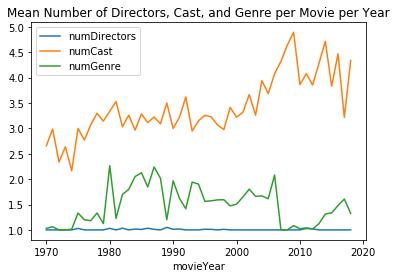

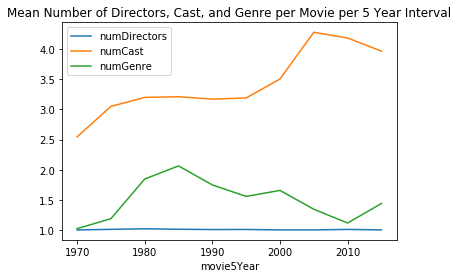

In [10]:
import matplotlib.pyplot as plt

colList = ['numDirectors','numCast','numGenre']

# computations and analysis for yearly counts

grpByYr = 'movieYear'
meanNumOverTime = bollywoodDF.groupby(grpByYr)[colList].mean()
title1 = "Mean Number of Directors, Cast, and Genre per Movie per Year"
meanNumOverTime.plot.line(title=title1)
plt.show()

# computations and analysis for 5 year intervals
grpBy5Yr = 'movie5Year'
meanNumOverTime5 = bollywoodDF.groupby(grpBy5Yr)[colList].mean()
title2 = "Mean Number of Directors, Cast, and Genre per Movie per 5 Year Interval"
meanNumOverTime5.plot.line(title=title2)


When averaged over the years:
<ol>
    <li>Regardless of the time frame used for grouping, the mean number of directors per movie is 1. This is the case no matter which movie industry we're talking about and what time periods are aggregated. Hence, the 'flat' line at the bottom of the chart </li>
    <li>While there has been substantial variability in the mean number of starring cast members per movie, the number has been systematically rising over time.</li>
    <li>The mean number of genre used to describe a movie jumps around between 1 and 2 in a seemingly random fashion, although the number peaked in the mid-80s and has generally declined since then.</li> 
</ol>

While these figures are mildly interesting, what's more intriguing is the lifespan and longitudinal patterns exhibited by the individual directors, cast members and genre and that underline these aggregate patterns. This is the analysis that follows.

<a id='most_active_dirs_cast_genre'></a>

<h4>Most Active Directors, Headline Cast Members, and Genre</h4>
<a href='#toc'>Return to TOC</a>

To move to the next step in the analysis (and to support the SNA in Phases 2 and 3), the individual strings representing each of the individual entities first need to be deconstructed (i.e. in our terms 'split'). In order to save the names of the individual entities once they're split, a different data structure is needed.

Having conducted a large number of similar analyses, the structure that comes immediately to mind is a Python dictionary. There are a variety of sources that explain the details behind Python dictionaries including a recent <a href="https://github.com/daveking63/Jupyter-iPython-Notebooks/blob/master/SemiStructuredData_PythonDicts_JSON_MongoDB_PyMongo.ipynb">notebook I put together on using dictionaries for analyzing semi-structured data</a>.

<a id='dictionary'>

<h5>Creating a Python Dictionary from the Bollywood Dataframe</h5>
<a href='#toc'>Return to TOC</a>

Succinctly put, a python <i>dictionary</i> (denoted 'dict') is  a 'mutable' collection of 'key:value' pairs where the pairs are separated by colons. Each 'key' is a pair is an immutable data type (integer, string or tuple) that is unique and each value is mutuable and can be of virtually any data type including another dictionary. The pairs within the collection are separated by commas and encased in 'curly' braces '{}'.

In this case the dictionary will actually be a nested dictionary of dictionaries. Here, the initial dictionary will basically consist of a collection of (inner) dictionaries each representing one of the 4908 rows in the dataframe/table That is,

    bollywoodDict = {
                     rowID_0:{colName0:cellValue, colName1:cellValue, ..., colNameN},
                     rowID_1:{colName0:cellValue, colName1:cellValue, ..., colNameN},
                     ...
                     rowID_m:{colName0:cellValue, colName1:cellValue, ..., colNameN}
                     }


For example, a dictionary entry representing the last row in our bollywoodDF dataframe might be:

    {4907:{'_id':4907, 'movieID':'2018-120', 'movieTitle':'Simmba', 'movieYear':2018, 'movie5Year':2015,
          'movieDirector': 'Rohit Shetty', 'movieCast':'Singh|Sara Ali Khan|Sonu Sood',
          'movieGenre':'Action|Comedy', 'count':1, 'numDirectors':1, 'numCast':3, 'numGenre':2]}
          
It usually takes a bit of finagling to set up a dictionary. However, in this case, there is a built-in pandas' method called 'DataFrame.to_dict' which will convert the current dataframe to a dictionary.

In [11]:
# converting dataframe representation to a dictionary

bollywoodDict = bollywoodDF.to_dict('index')
cnt = 0

print("Sample values from first 4 rows of dictionary:")
print("")
for ky, val in bollywoodDict.items():
    if cnt < 4:
        print(ky,val)
        print("")
    cnt += 1

Sample values from first 4 rows of dictionary:

0 {'_id': 0, 'movieID': '1970-0', 'movieTitle': 'Aag Aur Daag', 'movieYear': 1970, 'movie5Year': 1970, 'movieLink': '/wiki/Aag_Aur_Daag', 'movieDirector': 'A. Salaam', 'movieCast': 'Joy Mukherjee|Madan Puri', 'movieGenre': 'Action', 'count': 1, 'numDirectors': 1.0, 'numCast': 2.0, 'numGenre': 1.0}

1 {'_id': 1, 'movieID': '1970-1', 'movieTitle': 'Aan Milo Sajna', 'movieYear': 1970, 'movie5Year': 1970, 'movieLink': '/wiki/Aan_Milo_Sajna', 'movieDirector': 'Mukul Dutt', 'movieCast': 'Asha Parekh|Rajesh Khanna|Vinod Khanna', 'movieGenre': 'Drama', 'count': 1, 'numDirectors': 1.0, 'numCast': 3.0, 'numGenre': 1.0}

2 {'_id': 2, 'movieID': '1970-2', 'movieTitle': 'Aansoo Aur Muskan', 'movieYear': 1970, 'movie5Year': 1970, 'movieLink': '/wiki/Aansoo_Aur_Muskan', 'movieDirector': 'P. Madhavan', 'movieCast': 'Bindu|Padmini', 'movieGenre': 'Drama', 'count': 1, 'numDirectors': 1.0, 'numCast': 2.0, 'numGenre': 1.0}

3 {'_id': 3, 'movieID': '1970-3', 

Once this is done, it's simple enough to 'split' the concatenated strings (i.e. 'entity1|entity2|...') into lists of individual strings (i.e. \['entity1','entity2',...\] that can be stored in the dictionary. This is done below:

In [12]:
# converting string representations to lists by splitting strings at the pipe symbol '|'

def convertStringToList(movieDict, entityString):
    listOfEntities = []
    for ky in movieDict.keys():
        entities = movieDict[ky][entityString]
        if type(entities) != float:
            entityList = entities.split('|')
        else:
            entityList = []
        listOfEntities.append(entityList)
    return listOfEntities    
 
# normally I'd simply replace the values of the original keys.
# But, just in case things get screwed up while I'm testing it out I'll keep
# the original strings for backup. Also, it comes in handy sometimes
# for writing the data to a tabular file

directorLists = convertStringToList(bollywoodDict, 'movieDirector')
castLists = convertStringToList(bollywoodDict, 'movieCast')
genreLists = convertStringToList(bollywoodDict, 'movieGenre')

for ky in bollywoodDict.keys():
    bollywoodDict[ky]['movieDirectorList']= directorLists[ky]
    bollywoodDict[ky]['movieCastList'] = castLists[ky]
    bollywoodDict[ky]['movieGenreList'] = genreLists[ky]

print("Sample values for first and last movies in bollywoodDict:")
print("")
print(bollywoodDict[4906])
print("")
print(bollywoodDict[4907])     

Sample values for first and last movies in bollywoodDict:

{'_id': 4906, 'movieID': '2018-119', 'movieTitle': 'Zero (2018 film)', 'movieYear': 2018, 'movie5Year': 2015, 'movieLink': '/wiki/Zero_(2018_film)', 'movieDirector': 'Aanand L. Rai', 'movieCast': 'Shah Rukh Khan|Katrina Kaif|Anushka Sharma|Tigmanshu Dhulia', 'movieGenre': 'Comedy|Drama', 'count': 1, 'numDirectors': 1.0, 'numCast': 4.0, 'numGenre': 2.0, 'movieDirectorList': ['Aanand L. Rai'], 'movieCastList': ['Shah Rukh Khan', 'Katrina Kaif', 'Anushka Sharma', 'Tigmanshu Dhulia'], 'movieGenreList': ['Comedy', 'Drama']}

{'_id': 4907, 'movieID': '2018-120', 'movieTitle': 'Simmba', 'movieYear': 2018, 'movie5Year': 2015, 'movieLink': '/wiki/Simmba', 'movieDirector': 'Rohit Shetty', 'movieCast': 'Ranveer Singh|Sara Ali Khan|Sonu Sood', 'movieGenre': 'Action|Comedy', 'count': 1, 'numDirectors': 1.0, 'numCast': 3.0, 'numGenre': 2.0, 'movieDirectorList': ['Rohit Shetty'], 'movieCastList': ['Ranveer Singh', 'Sara Ali Khan', 'Sonu Sood'

<a id='analyze_individual'></a>

<h5>Analyzing Individual Directors, Cast Members and Genre Counts: Python Counters</h5>
<a href='#toc'>Return to TOC</a>

Now that we have the lists of directors, cast members and genre for each movie, we can use a Python 'counter' (part of the 'collections' class) to create a list of all individual directors, headline cast members, and assigned genre along with the frequency with which they appear.

What each counter (designated as directorCnt, castMemCnt, and genreCnt) provides is a list of tuples of the form '\[('e1',c1),('e2',c2),...,('eN',cN)\]' where 'e' is a string representing a director name, cast member name, or genre label and 'c' is a number representing the frequency with which the name or label appears. For directors and cast members these lists are long, 1867 and 3336 respectively. For genre the list is short (107). Because the first two lists are too long to enumerate on 'paper' I decided to simply list the top 25 for each followed by a bar chart for each of the top 25 lists. A list of the top N along with their associated counts can be generated by the counter method '.most_common(N)'. In this case it would be '.most_common(25)'.

In [13]:
import collections as cl

def createEntityCnt(movieDict,entityListName):   
    entityCnt = cl.Counter()
    for ky in movieDict.keys():
        for eName in movieDict[ky][entityListName]:
            if type(eName) != float:
                entityCnt[eName] += 1
    return entityCnt

# 'Counters' of director, cast member and genre counts
# from createEntityCnt function.

directorCnt = createEntityCnt(bollywoodDict,'movieDirectorList')
castMemCnt = createEntityCnt(bollywoodDict,'movieCastList')
genreCnt = createEntityCnt(bollywoodDict,'movieGenreList')

# Top 25 entities generated # from each Counter by applyiing
# '.most_common(N)' method to the Counters.

top25Directors = directorCnt.most_common(25)
top25CastMembers = castMemCnt.most_common(25)
top25Genre = genreCnt.most_common(25)

# Top 25 listings for each entity type

print('Number of unique movie director names for all films from 1970-2018:', len(directorCnt))
print("")
print('Top 25 Directors who directed most movies from 1970-2018')
top25Directors = directorCnt.most_common(25)
print(top25Directors)
print("")

print('Number of unique headline cast members for all films from 1970-2018:', len(castMemCnt))
print("")
print('Top 25 Starring Cast Members who acted in the most movies from 1970-2018')
top25CastMembers = castMemCnt.most_common(25)
print(top25CastMembers)
print("")

print('Number of unique genre for all films from 1970-2018:', len(genreCnt))
print("")
print('Top 25 Genre that were applied to the most movies from 1970-2018')
top25Genre = genreCnt.most_common(25)
print(top25Genre)
print("")

Number of unique movie director names for all films from 1970-2018: 1867

Top 25 Directors who directed most movies from 1970-2018
[('Mahesh Bhatt', 38), ('David Dhawan', 35), ('Priyadarshan', 27), ('Vikram Bhatt', 26), ('Ram Gopal Varma', 24), ('Hrishikesh Mukherjee', 23), ('K. Bapaiah', 22), ('Shyam Benegal', 20), ('Shibu Mitra', 19), ('Prakash Mehra', 18), ('Basu Chatterjee', 18), ('Harmesh Malhotra', 18), ('B.R. Ishara', 17), ('Manmohan Desai', 17), ('Subhash Ghai', 17), ('Shakti Samanta', 16), ('Dev Anand', 16), ('T. Rama Rao', 16), ('Prakash Jha', 16), ('Raj Kanwar', 16), ('Ravikant Nagaich', 15), ('Yash Chopra', 15), ('Umesh Mehra', 15), ('Deepak Bahry', 14), ('Ketan Mehta', 14)]

Number of unique headline cast members for all films from 1970-2018: 3336

Top 25 Starring Cast Members who acted in the most movies from 1970-2018
[('Mithun Chakraborty', 174), ('Pran', 171), ('Amitabh Bachchan', 156), ('Dharmendra', 150), ('Jeetendra', 134), ('Jackie Shroff', 128), ('Rekha', 125), ('

In their current state, each of the the Counters obviously consists of a set of tuples that are in descending order by frequency of occurrence. Before the data can be plotted these list of tuples need to be converted into vectors or a dataframe (of vectors). The following code does this for each of the Counters (top25Directors, top25CastMembers, and top25Gengre). First, the list of tuples for Counter is converted into two lists (e.g. topDirectors into dirNames and numDirMovies). Then, the 6 lists created by the conversion are are all combined into a dataframe called 'movieCntsDF'.

In [14]:
# Convert each Counter into a pair of lists [names] & [counts]

dirNames = []
numDirMovies = []
for dir in top25Directors:
    dirNames.append(dir[0])
    numDirMovies.append(dir[1])

castNames = []
numCastMovies = []
for cast in top25CastMembers:
    castNames.append(cast[0])
    numCastMovies.append(cast[1])

genre = []    
numGenreMovies = []
for gen in top25Genre:
    genre.append(gen[0])
    numGenreMovies.append(gen[1])
    
# 6 lists are combined into a dataframe
    
mLists = [dirNames, numDirMovies, castNames, numCastMovies, genre, numGenreMovies]
movieCntsDF = pd.concat([pd.Series(x) for x in mLists], axis=1)
movieCntsDF.columns = ['dirNames','numDirMovies','castNames','numCastMovies','genre','numGenreMovies']

print('Structure of and sample rows from dataframe movieCntsDF:')
movieCntsDF.shape
movieCntsDF.head(3)
movieCntsDF.tail(3)

Structure of and sample rows from dataframe movieCntsDF:


(25, 6)

,dirNames,numDirMovies,castNames,numCastMovies,genre,numGenreMovies
0,Mahesh Bhatt,38,Mithun Chakraborty,174,Drama,1498
1,David Dhawan,35,Pran,171,Romance,781
2,Priyadarshan,27,Amitabh Bachchan,156,Action,756


,dirNames,numDirMovies,castNames,numCastMovies,genre,numGenreMovies
22,Umesh Mehra,15,Salman Khan,85,Political,10
23,Deepak Bahry,14,Sanjeev Kumar,81,Children,8
24,Ketan Mehta,14,Paresh Rawal,80,Psychological,7


Once this is done the appropriate columns can be feed to a dataframe plotting function that produces bar charts based on each pair of name and count columns.

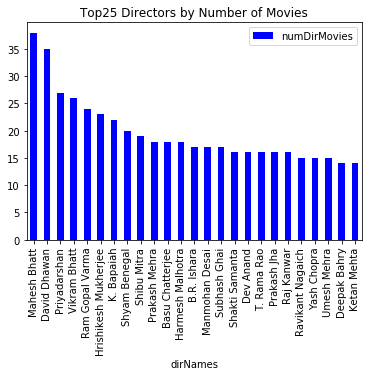

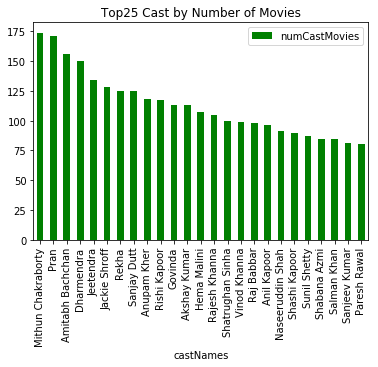

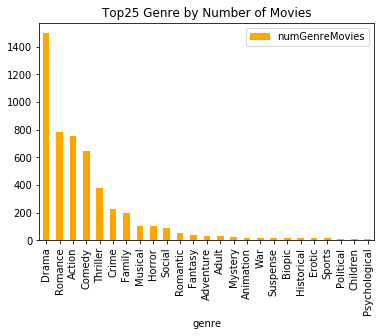

In [15]:
movieCntsDF.plot(kind='bar', x='dirNames', y='numDirMovies', color='blue', title='Top25 Directors by Number of Movies')
movieCntsDF.plot(kind='bar', x='castNames', y='numCastMovies', color='green', title='Top25 Cast by Number of Movies')
movieCntsDF.plot(kind='bar', x='genre', y='numGenreMovies', color='orange', title='Top25 Genre by Number of Movies')

<a id='skewed_distribution'></a>

<h5>Skewed Distributions for Ranked Listings of Directors, Cast Members and Genre</h5>
<a href='#toc'>Return to TOC</a>

The distribution of all these ranked listings is clearly skewed, a pattern easily seen from the bar plots.

For directors, the individual who directed the most movies was Mahesh Bhatt with 38.  He was followed quite closely by David Dhawan with 35.  The director in tenth position was Shibu Mitra with 19 movies, half of Bhatt's number. In comparison, this doesn't seem like that many movies.

For directors and starring cast members, part of the skewed distribution may be accounted for by the differences in age and career longevity among the various directors and starring cast members. Older directors and starring cast members have usually been around longer (in the industry) and, as a consequence, have had a greater opportunity than their counterparts to be involved in more movies. While this may account for some of the differences, as we'll see shortly, it doesn't completely explain the differences because even the top directors and starring cast members all seem to have a (single) peak in their careers which tapers off as time passes.

The same is not necessarily true for 'genre'.  Over the years, there have been 107 unique genre labels used (either alone or in combination) to describe the thematic content of Bollywood movies. While 107 is a fairly long list for a 'tag' collection, you can see from the above distribution that the top 5 labels -- drama, romance, action, comedy, thriller -- seem to dominate, accounting for ~80% of all the 5214 labels applied to the movies from 1970 to the present. The top 10 genre, account for ~90%. So, that leaves about 500 movies for the other 97 genre. In the grand scheme, most of these remaining genre are basically 'noise'.

<a id='dictionary_longitudinal_individuals'></a>

<h5>Creating a Dictionary for Longitudinal Analysis of Individual Entity Counts and Rankings</h5>
<a href='#toc'>Return to TOC</a>

In order to view these individual counts and rankings from a longitudinal perspective, it's best to create a second dictionary, labeled 'years5Dict', to divide the counts and rankings into 5 year intervals. So, for instance, we'd divide the counts for 'Mahesh Bhatt' (the top ranked director) across the ten time intervals (1970-74, 1975-1979, ..., 2015-2019). In this way we can capture his career from a longitudinal perspective -- when did he start? when did he peak? when did his directorial career end? How long was his career? etc. It's the same sort of questions that can be applied to all the other directors, cast members, and to the genre labels. While individual views are interesting, en masse they provide a combined image of a typical career or typical genre usage.

The end result of the grouping process is nested dictionary (year5Dict) whose outer keys are the time intervals (designated by the lower limits of the interval) and whose inner keys include:

<ul>
    <li>Lists for all the individual entity names or labels: dirlist, castList, and genreList.</li>
    <li>Counters (tuples) for all the individual entity counts: directorCnt, castMemCnt, and genreCnt.</li>
    <li>Counters (tuples) for the 25 most frequent individual entities of each type: dirMostCommon25, castMostCommon25, and genreMostCommon25. The</li>
</ul>

In [16]:
# Creating a new dictionary 'years5Dict' to hold all the 5 year interval lists and
# counts for total movies, directors, headline cast members, and genre

years5Dict = {}
for ky in bollywoodDict.keys():
    years5 = bollywoodDict[ky]['movie5Year']
    # for each 5 year period initialize a dictionary
    if years5 not in years5Dict.keys():
        years5Dict[years5] = {}
        years5Dict[years5]['dirList'] = []
        years5Dict[years5]['castList'] = []
        years5Dict[years5]['genreList'] = []
    years5Dict[years5]['dirList'] = years5Dict[years5]['dirList'] + bollywoodDict[ky]['movieDirectorList']
    years5Dict[years5]['castList'] = years5Dict[years5]['castList'] + bollywoodDict[ky]['movieCastList']      
    years5Dict[years5]['genreList'] = years5Dict[years5]['genreList'] + bollywoodDict[ky]['movieGenreList']

# create list of movie counts for 5 year interval -- uses bollywoodDF
# note this is a bit of a cheat.  Could have done the same thing using
# a separate collection counter on 'movie5Year' (although more involved)

movieCnts5Years = bollywoodDF.groupby('movie5Year')['movie5Year'].count()

# use collection counters -- cl.Counter() -- to count directors, cast members and genre for 5 year intervals

def createCounter(yDict, entityList,entityCntStr,entityMCStr,numEntities):
    tempDict = {}
    for ky in yDict.keys(): tempDict[ky] = {}
    for ky in yDict.keys():
        entityCnt = cl.Counter()
        for eName in yDict[ky][entityList]:
            if type(eName) != float:
                entityCnt[eName] += 1
        tempDict[ky][entityCntStr] = entityCnt
        tempDict[ky][entityMCStr] = entityCnt.most_common(numEntities)
    return tempDict

tempDirDict = createCounter(years5Dict, 'dirList', 'directorCnt', 'dirMostCommon25', 25 )
tempCastDict = createCounter(years5Dict, 'castList', 'castMemCnt', 'castMostCommon25', 25 )
tempGenreDict = createCounter(years5Dict, 'genreList', 'genreCnt', 'genreMostCommon10', 10 )

for ky in years5Dict.keys():
    years5Dict[ky]['movieCnt'] = movieCnts5Years[ky]
    years5Dict[ky]['directorCnt'] = tempDirDict[ky]['directorCnt']
    years5Dict[ky]['dirMostCommon25'] = tempDirDict[ky]['dirMostCommon25']
    years5Dict[ky]['castMemCnt'] = tempCastDict[ky]['castMemCnt']
    years5Dict[ky]['castMostCommon25'] = tempCastDict[ky]['castMostCommon25']
    years5Dict[ky]['genreCnt'] = tempGenreDict[ky]['genreCnt']
    years5Dict[ky]['genreMostCommon10'] = tempGenreDict[ky]['genreMostCommon10']

print("***year5Dict keys:")
years5Dict.keys()
print("")
print("***names of fields for each 5 year interval:")
years5Dict[1970].keys()
print("")
print("***Sample field 'directorCnt' -- counts from sample of 10 out of 213 director in the list for 1970-74:")
print("note: converted to dictionary in order to restrict out - otherwise get the whole list")
print("")
dir1970Cnt = dict(years5Dict[1970]['directorCnt'])
dir1970CntList = list(dir1970Cnt.items())
print(dir1970CntList[0:10])
print("")
print("***Sample field 'dirMostCommon25' -- list of the 25 directors who have directed the most movies from 1970-74:")
print("")
print(years5Dict[1970]['dirMostCommon25'])

***year5Dict keys:


dict_keys([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015])


***names of fields for each 5 year interval:


dict_keys(['dirList', 'castList', 'genreList', 'movieCnt', 'directorCnt', 'dirMostCommon25', 'castMemCnt', 'castMostCommon25', 'genreCnt', 'genreMostCommon10'])


***Sample field 'directorCnt' -- counts from sample of 10 out of 213 director in the list for 1970-74:
note: converted to dictionary in order to restrict out - otherwise get the whole list

[('A. Salaam', 1), ('Mukul Dutt', 3), ('P. Madhavan', 2), ('Subodh Mukherjee', 1), ('Kotayya Pratyagatma', 3), ('Babubhai Mistri', 2), ('Raja Nawathe', 2), ('James Ivory', 1), ('B.R. Ishara', 8), ('Mohammed Hussain', 4)]

***Sample field 'dirMostCommon25' -- list of the 25 directors who have directed the most movies from 1970-74:

[('B.R. Ishara', 8), ('Hrishikesh Mukherjee', 8), ('Shakti Samanta', 7), ('Adurthi Subba Rao', 6), ('Naresh Kumar', 6), ('A. Bhimsingh', 6), ('Manmohan Desai', 6), ('Chandrakant', 6), ('Prakash Mehra', 6), ('Ravikant Nagaich', 5), ('Satyen Bose', 5), ('Asit Sen', 5), ('K. Shankar', 5), ('Mohammed Hussain', 4), ('Ramanna', 4), ('Vijay Anand', 4), ('Rajendra Bhatia', 4), ('Dev Anand', 4), ('Bhappi Sonie', 4), ('Atma Ram', 4), ('Mohan Kumar', 4), ('S.M. Sagar', 4), ('Tapi Ch

<a id='individual_entities'></a>

<h4>Patterns of Interest in Individual Directors, Cast Members and Genre</h4>
<a href='#toc'>Return to TOC</a>

The analyses which follows in the remainder of this notebook is focused on investigating the following trends across the 5 year time intervals from 1970 to the present:
<ol>
    <li>Movie counts for the 'top' individual directors, cast members, and genre.</li>
    <li>Appearances in the top 25 by individual directors, cast members, and genre.</li>
    <li>Typical 'career lifespan' of all directors, cast members, and genre based on start dates</li>
</ol>

The code that follows is divided into 2 blocks with the first black handling the first two sets of trends and the second block covering covering the last set of trends.
<br>

<a id='view_top'></a>

<h5>View from the Top: How Many Movies and How Many Years?</h5>
<a href='#toc'>Return to TOC</a>

The first two trends of interest involve the top entities. More specifically, the top 25 directors, 25 starring cast members, and 25 genre.  The patterns of interest revolve are the questions: (1) how many movies were they involved over the span of 5 year intervals from 1970 to the present; and (2) how persistent was their presence at the top (i.e. when and how often were they in the top group over the span of 5 year intervals from 1970 to the present). The answer to these two questions are provided by the following two functions.

The first function 'createDFTop' returns a dataframe whose:

<ul>
    <li>rows are the names of a specified number (numEntities) of top entities by total number of movies over all the years from l9170 to the present</li>
    <li>columns are the 5 year periods from 1970 to the present</li>
    <li>cells indicate the number of movies in which the named entity was active (directed, acted or labeled) during the specified 5 year period.</li>
</ul>

For example, as shown below in this dataframe for top directors, 'Maresh Bhatt' directed the most movies (38) from 1970 to the present.  His data is in the top row. He started showly directed 1 movie from 1970-1974, 1 from 1975-1979, 3 from 1980-1984, 7 from 1985-1989, 15 from 1990-1994, 10 from 1995-1999, 0 from 2000-2014 (a long stretch), 1 from 2015-2018. Obviously, these number give you a sense of the flow of his career from a 'count' perspective. The same is true for the rest of the top directors in this particular dataframe.

The second function 'createDFInTopN' returns a dataframe whose:

<ul>
    <li>rows are the names of a specified number (entityCnt) of top entities by total number of times the entity was in the top N entities overall all the years from 1970 to the present</li>
    <li>columns are the 5 year periods from 1970 to the present</li>
    <li>each cell indicates whether the named entity was in (1) or out (0) of the top N entities for that time interval.</li>
</ul>

So, continuing with Mahesh Bhatt, we can see that he was not the overall leader in terms of appearances in the top 10 group. Instead, was 6th (in the 6th row). His entries in the dataframe indicate that he was in the top 10 for 4 of the ten 5 year intervals running consecutively from 1980-1999.     

Taken together these two dataframes provide a quick summary of the 'lifespan' patterns for the top entities.  These patterns are discussed below for each group of entities.

In [17]:
# First function -- createDFTop

# For those entities (director, actor, genre) with the highest (numEntities) overall counts
# create a dataframe containing the total number of movies for each entity (row)
# and for each 5 year time interval (column)

# Parameters:

# yearsDict -    dictionary with 5 year interval data (for us that's years5Dict)
# numIntervals - number of 5 year intervals to analyze
# numEntities -  number of top entities to analyze (directors,cast,genre)
# entityCnt -    string that stands for the list of top entities, along with the number of movies 
#                produced, acted in or labeled. It is a collections.Counter 
#                (i.e. directorCnt, castMemCnt,or genreCnt)
# topList -      list of the topN entities by name - at moment it's the top 25 
# arrTop -       creates an numEntities x numIntervals np array where cells are the counts for a given
#                entity in a given time interval
# topDF -        function returns a pandas dataframe containing arrTop values with labeled cols and rows

def createDFTop(yearsDict,numIntervals,numEntities,entityCnt,topList):
    top = [i for i,j in topList[0:numEntities]]
    yrList = list(years5Dict.keys())
    arrTop = np.zeros((numEntities,numIntervals))
    
    for i in range(numEntities):
        totEnts = 0
        for j in range(len(yrList)):
            numEnts = years5Dict[yrList[j]][entityCnt][top[i]]
            arrTop[i,j] = numEnts
            
    topDF = pd.DataFrame(data=arrTop,columns=yrList,index=top)                              
    return topDF

In [18]:
# Second Function:

# For those Entities with the highest topN overall counts
# Show whether an individual entity was in or out of the topN
# for each of the 5 year time intervals from 1970 to present

# yearsDict and entityCnt same as above
# topN - determines that rank positions against which to compare
#        entities in entityCnt
# entTopNList - list of TopN entities for each 5 year time interval
# arrNTop - an np array whose columns and rows are numEntities x numIntervals
#           and whose cells are either 0 or 1 indicating whether a given
#           entity is in the TopN entities for a given 5 year time interval
# topNDF - returned by function. It is the pandas dataframe representation of arrNTop

def createDFInTopN(yearsDict,entityCnt,topN):
   
    yrList = list(yearsDict.keys())
    numIntervals = len(yrList)
    
    entTopNList = []
    for yr in yrList:
        for i in range(0,topN):
            entName = yearsDict[yr][entityCnt][i][0]
            entTopNList = entTopNList + [entName]
    entNamesSetList = list(set(entTopNList))
    numEntities = len(entNamesSetList)

    arrNTop = np.zeros((numEntities,numIntervals))
    
    for i in range(numIntervals):
        yr = yrList[i]
        tempNDict = dict(yearsDict[yr][entityCnt])
        for j in range(numEntities):
            entName = entNamesSetList[j]
            if entName in tempNDict.keys():
                arrNTop[j,i] = 1

    topNDF = pd.DataFrame(data=arrNTop,columns=yrList,index=entNamesSetList)

    return topNDF

<a id='top_directors'></a>

<h5>Analysis of 'Top' Individual Directors</h5>
<a href='#toc'>Return to TOC</a>

<i>Results for Total Movies and Top Rankings</i>

The first dataframe shown (immediately below) pertains to the top 7 directors (by total movies directed) and displays the number of movies they directed by 5 year time interval along with the sum of these numbers for all time periods across all time intervals. In most cases, the top 5 would have been selected, but here the the total number of movies directed by the top 5-7 were essentially the same. So, 7 directors rather than 5 were analyzed.

The second dataframe pertaining to directors shows the top 10 directors (by total number of times they were in the top 10). For each of these top directors, the numbers are essentially boolean flags (0,1) indicating whether they were in or out of the top 10 for a particular 5 year interval. 

Number of Movies directed in 5 year interval by Top 7 Directors


,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,Tot
Mahesh Bhatt,1.0,1.0,3.0,7.0,15.0,10.0,0.0,0.0,0.0,1.0,38.0
David Dhawan,0.0,0.0,0.0,0.0,9.0,12.0,8.0,2.0,3.0,1.0,35.0
Priyadarshan,0.0,0.0,0.0,0.0,2.0,5.0,5.0,9.0,6.0,0.0,27.0
Vikram Bhatt,0.0,0.0,0.0,0.0,2.0,4.0,4.0,7.0,5.0,4.0,26.0
Ram Gopal Varma,0.0,0.0,0.0,0.0,1.0,6.0,3.0,8.0,4.0,2.0,24.0
Hrishikesh Mukherjee,8.0,5.0,6.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,23.0
K. Bapaiah,0.0,0.0,5.0,12.0,4.0,1.0,0.0,0.0,0.0,0.0,22.0


5 year intervals in which director was ranked in Top 10
Displays 12 because there were a number of ties at 3 appearances


,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,Tot
Vikram Bhatt,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,5.0
Hrishikesh Mukherjee,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
David Dhawan,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,4.0
Priyadarshan,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,4.0
Ram Gopal Varma,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,4.0
Mahesh Bhatt,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0
Shibu Mitra,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
Rohit Shetty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0
Prakash Jha,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0
Anurag Kashyap,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0


Line Plot of Number of Movies directed in 5 year interval by Top 7 Directors


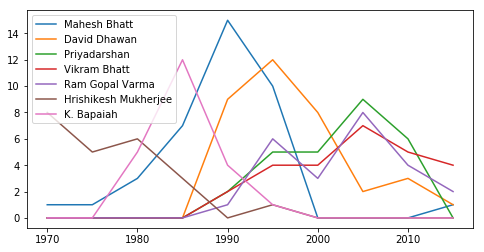

In [19]:
dirTopArrayDF = createDFTop(years5Dict, 10, 7, 'directorCnt', top25Directors)
dirTopArrayDF['Tot'] = dirTopArrayDF.sum(axis=1)
print("Number of Movies directed in 5 year interval by Top 7 Directors")
dirTopArrayDF

# Created array of top 10 directors showing those time intervals in which
# they were in the top 10 rankings

dirInTopNDF = createDFInTopN(years5Dict,'dirMostCommon25',25)
dirInTopNDF['Tot'] = dirInTopNDF.sum(axis=1)
print("5 year intervals in which director was ranked in Top 10")
print("Displays 12 because there were a number of ties at 3 appearances")
dirInTopNDF.sort_values('Tot',ascending=False).head(12)
yrList = list(years5Dict.keys())
print("Line Plot of Number of Movies directed in 5 year interval by Top 7 Directors")
dirTopArrayDF[yrList].transpose().plot(kind='line',legend=True,figsize=(8,4))

<i>Summary Results for 'Top' Individual Directors</i>

Most of the Top ranked Directors (1-25) are well known to Bollywood fans. The figures provided in the above 2 tables and line plots indicate that these top directors typically:

<ol>
    <li>Enjoy Fairly Long Careers - Given that these are 5 year time intervals, each of these director's 'directing' careers spanned 5-6 of these intervals, indicating careers of 25 to 30 years. In actuality, the overall careers of many of the top directors were longer than this because many of them were also writers and producers. For example, Mahesh Bhatt, who at at the top, directed movies from 1970 - 1994. After 1994, he began producing movies and continues in that role today. </li>
    <li>Have a 15 year Peak or Plateau - This trend or pattern is best seen in the line plots. In examining the flow of these plots it is important to remember that these are 5 year intervals, so that if someone has 4 movies in a given interval that's less than 1 movie a year, or if it's 9 movies that's less than 2 a year. Given this, it seems for many of the top directors there is approximately a 15 year period of sustained production in which the number of movies directed increases for about 5 years, hits a peak for 5 years, drops back for 5 years, and followed by a rapid decline to 0. The  prototype of this pattern is the Bollywood directing career of K. Bapaiah who began directing Bollywood movies in 1980 at which point he directed 5 movie from 1985-1989, 9 from 1990-1994, back down to 4 from 1995-1999, then basically 1 movie from 2000 on. This pattern of rise, peak and fall is also supported by looking at the pattern of intervals in which a director was ranked in the Top 1-10. Again, for K. Bapaiah (although not shown) there was a 15 year period in which he was in the top rankings. These years obviously matched the years of his peak production.  Like Bapaiah, most of the top directors were in the top rankings for approximately 15-20 years in a row (i.e. sequence of  3-4 '1s' preceded and followed by some number of '0s').</li>
</ol>
    
Of course, these patterns begin to dissolve or fragment once the focus moves from the career patterns of the top directors to the career patterns of the average director. In the next segment or block of the analysis , what we will see is that the overwhelming mass of directors actually have short lived careers of 5 years or less.

\[Note: In looking at these figures, you should keep in mind that these are figures for Bollywood. There are other Indian films outside of Bollywood produced for other languages. For example, from 1970-1987, K. Bapaiah directed 27 Telegu films. For the most part his Telegu films followed the same pattern as his Hindi films, except they declined as his Bollywood output increased.\]

<a id='top_cast'></a>

<h5>Analysis of 'Top' Individual Starring Cast Members</h5>
<a href='#toc'>Return to TOC</a>

<i>Results for Total Movies and Top Rankings</i>

As before, the first dataframe shown pertains to the top 6 starring cast members (by total movies) and displays the number of movies in which they acted for each 5 year time interval along with the sum of these numbers across all time intervals. Again, 6 rather than 5 starring cast members were used, only this time the addition was made because Jackie Schroff was among the top actors in terms of number of appearances in the top 10 list.

The second dataframe pertaining to starring cast members shows the top 10 starring cast members (by total number of times they were in the top 10). Again, the numbers in this dataframe are essentially boolean flags (0,1) indicating whether a particular cast member was in or out of the top 10 for a particular 5 year interval.

Number of Movies  per 5 year interval for Top 6 Cast Members


,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,Tot
Mithun Chakraborty,0.0,3.0,38.0,36.0,31.0,39.0,4.0,14.0,9.0,0.0,174.0
Pran,49.0,26.0,43.0,25.0,15.0,12.0,1.0,0.0,0.0,0.0,171.0
Amitabh Bachchan,20.0,28.0,22.0,10.0,8.0,7.0,18.0,26.0,9.0,8.0,156.0
Dharmendra,28.0,22.0,26.0,22.0,21.0,16.0,5.0,4.0,4.0,2.0,150.0
Jeetendra,22.0,19.0,41.0,18.0,24.0,9.0,1.0,0.0,0.0,0.0,134.0
Jackie Shroff,0.0,0.0,1.0,20.0,22.0,29.0,21.0,16.0,13.0,6.0,128.0


,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,Tot
Jackie Shroff,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,6.0
Amitabh Bachchan,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,6.0
Dharmendra,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,6.0
Akshay Kumar,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0
Rishi Kapoor,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,5.0
Salman Khan,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,5.0
Jeetendra,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
Sanjay Dutt,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,5.0
Pran,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
Anil Kapoor,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0


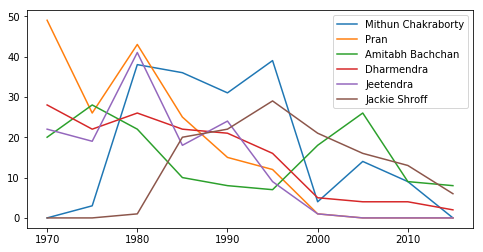

In [20]:
castTopArrayDF = createDFTop(years5Dict, 10, 6, 'castMemCnt', top25CastMembers)
castTopArrayDF['Tot'] = castTopArrayDF.sum(axis=1)
print("Number of Movies  per 5 year interval for Top 6 Cast Members")
castTopArrayDF

castInTop25DF = createDFInTopN(years5Dict,'castMostCommon25',10)
castInTop25DF['Tot'] = castInTop25DF.sum(axis=1)
castSorted25 = castInTop25DF.sort_values('Tot',ascending=False).head(10)
castSorted25

castTopArrayDF[yrList].transpose().plot(kind='line',legend=True,figsize=(8,4))

<i>Summary Results for 'Top' Individual Starring Cast Members</i>

Most of Top Ranked Starring Cast members are very well known to Bollywood fans and to much of the Indian population at large. Like their director counterparts, they also have enjoyed long careers highlighted by peak output. Succinctly put, the differences between the top actors and top directors is that top actors are usually involved in many more movies, their careers last longer, and the peaks in their output are more sustained. However, like directors who aren't at the top,  we'll also find a bit later that those actors not in the top ranks have very short careers also.

In summary, the figures provided in the above 2 tables and line plots pertaining to cast members indicate that the 'top' actors typically:

<ol>
    <li>Work in many more movies - The top Bollywood director (Mahesh Bhatt) directed 38 movies, the top Bollywood actor (Mithun Chakraborty) was in 174 movies. The 5th ranked director (Ram Gopal Varma) directed 24 movies, the 5th ranked actor (Jeetendra) was in 134 movies. Of course, there'a only one director per movie but many actors. Additionally, directing a movie usually involves greater time committment to the single movie than acting does.</li>
    <li>Have very long Careers - For 3 of the Top 6 actors, their careers started before the 1970s. Pran started in the 40s, Dharmendra in the 50s, and Jeetendra in the 60s. 2 of the 6 actors -- Amitabh Bachchan and Jackie Shroff -- are still active. Only one of them - Pran - is deceased. So far, Dharmendra has the longest career, 60 to 65 years (based on additional data), followed by Pran who worked for 55 years, and Bachchan who has worked for 50 years. Of course, it's still possible for Bachchan and Shroff to surpass Dharmendar in longevity because they are still active.</li>
    <li>Usually reach a Peak that is often sustained - Again, you get a sense of the pattern by looking at the line charts for these Top actors. Here, you can discern a peak, but it's clear that for sometime before and after the actual peak the number of appearances is relatively high. The decline in appearances (output) for Top actors is also much more gradual than it is for Top directors. In fact, for 2 of these actors - Mithun Chakraborty and Amitabh Bachchan - they had career revivals after their original peak. For Bachchan, the revival (which was about 30 years later) was as strong as the original peak. You can get a sense of the length of sustained output by looking at those years in which the actor was in the top rankings -- here the sequences of '1s' preceded and followed by 'os' is usually 5-6 intervals in length (meaning a 25-30 year run at the top).</li>
</ol>

<a id='top_genre'></a>

<h5>Analysis of 'Top' Individual Genre</h5>
<a href='#toc'>Return to TOC</a>

<i>Results for Total Movies and Top Rankings</i>

As before, the first dataframe shown pertains to the top 6 genre (by total movie count) and displays the number of movies to which the Ttop individual genre were applied for each 5 year time interval along with the sum of these numbers for a given genre across all time intervals. Again, 6 rather than 5 genre were analyzed because the 6th ranked genre 'crime' enjoyed very wide spread use from 1980-1999 and has almost always been ranked among the top.

In the same vein, the second dataframe, showing the number of 5 year time intervals where a genre was ranked among the top in terms of use, includes the top 6 rather than top 5 also because of 'crimes' wide spread use across the years.

Number of Movies per 5 year interval for Top 6 Genre


,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,Tot
Drama,223.0,55.0,203.0,114.0,172.0,129.0,167.0,142.0,117.0,176.0,1498.0
Romance,69.0,33.0,73.0,45.0,117.0,85.0,119.0,78.0,93.0,69.0,781.0
Action,37.0,20.0,106.0,90.0,152.0,120.0,61.0,38.0,68.0,64.0,756.0
Comedy,17.0,9.0,49.0,28.0,42.0,50.0,63.0,121.0,139.0,125.0,643.0
Thriller,15.0,2.0,28.0,22.0,25.0,20.0,59.0,66.0,56.0,83.0,376.0
Crime,4.0,1.0,36.0,37.0,62.0,30.0,7.0,10.0,16.0,21.0,224.0


,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,Tot
Romance,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0
Comedy,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0
Action,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0
Thriller,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0
Drama,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0
Crime,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0


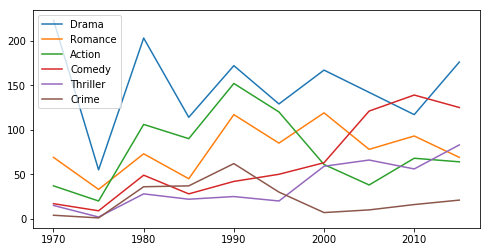

In [21]:
genreTopArrayDF = createDFTop(years5Dict, 10, 6, 'genreCnt', top25Genre)
genreTopArrayDF['Tot'] = genreTopArrayDF.sum(axis=1)
print("Number of Movies per 5 year interval for Top 6 Genre")
genreTopArrayDF

genreInTopNDF = createDFInTopN(years5Dict,'genreMostCommon10',6)
genreInTopNDF['Tot'] = genreInTopNDF.sum(axis=1)
genreSortedN = genreInTopNDF.sort_values('Tot',ascending=False).head(6)
genreSortedN

genreTopArrayDF[yrList].transpose().plot(kind='line',legend=True, figsize=(8,4))

<i>Summary of 5 Year Movie Counts for the 'Top' Individual Genre</i>

When it comes to applying various genre (thematic tags) to movies, the patterns and trends are different for the Top genre than they are for the Top directors and cast members. Bottomline, out of the 107 different genre that have been applied over the 49 year period from 1970 to the present day, 6 account for the overwhelming majority of the labels actually used -- Drama, Romance, Action, Comedy, Thriller and Crime. Currently, among these 6, 3 are declining in usage (Action, Romance and Crime), 2 are rising (Comedy and Thriller), and 1 (Drama) seems to seesaw back and forth while still maintaining the top slot. However, regardless of these shifts, there was only one time (for the 'Crime' genre in 1975) when there was any other label among the Top 6 and one time (2010-2014) when 'Drama' wasn't the most frequently used tag.

<a id='lifespan'></a>

<h3>Survival Analysis: Analyzing the 'Lifespan' of Directors, Cast Members, and Genre</h3>
<a href='#toc'>Return to TOC</a>

There's a really old adage that "old soldiers never die, they just fade away." While the same may be true for the top directors, actors, and possibly genre, it certainly isn't true for the average director, actor or genre. The 'lifespan' of the average is like a Mayfly - very short lived.

<h4>Defining Survival Analysis</h4>

Estimating or predicting lifespan comes under the heading of <a href="">'survival analysis'</a>. More specifically, it is a:

>branch of statistics for analyzing the expected duration of time until one or more events happen, such as death in biological organisms and failure in mechanical systems. This topic is called reliability theory or reliability analysis in engineering, duration analysis or duration modelling in economics, and event history analysis in sociology

As noted, the events can be virtually anything that is time bound where the duration of the event is measure in time units commensurate with the nature of the phenomenon leading up to the event. This could be seconds, minutes, hours, days, weeks, months, years or larger intervals depending on the event of interest.  The duration of time leading up to the event of interest is called the <i>survival time</i>.

In this project, 

<ul>
    <li>The events of interests are the duration of a director's or actor's career or the lifetime usage of a particular genre.</li>
    <li>The unit of time is measured in 5 year intervals.</li>
    <li>Survival time is the number of years (in steps of 5 years) that a director or actor was active in at least one movie or a genre was used to describe at least one movie (within a 5 year interval).</li>
</ul>

<h4>Survival Function</h4>

One of the major focal points of survival analysis is estimation of the 'survival function' <i>S(t)</i> of the population of interest. It is defined as:

    S(t) = Pr(T>t) 
    
where:

<ul>
    <li><i>T</i> is a 'non-negative' (≥0) random variable that represents a subject's survival time</li>
    <li>The value of S(t) runs from 0≤S(t)≤1 (because it's a probability)</li>
    <li>S(0) = 1</li>
</ul>

For a variety of reasons, in practice there is virtually no way to know the actual 'population' probability, so we estimate it. One popular method for estimating the probability is <i>Kaplan–Meier</i> which is defined as:

    S(t)=∏(ni−di)/ni
    
where:

<ul>
    <li><i>di</i> is the number of events (deaths) observed at time <i>ti</i></li>
    <li><i>ni</i> is the number of subjects at risk (of death) prior to time <i>t</i></li>
    <li>the product sum is calculated for all <i>ti</i> less than <i>T</i></li>
</ul>

<h4>Missing Data and Censoring</h4>

In many cases, the reason why we can't determine the actual population probability is because of incomplete or missing data produced in part because studies are "time bound". For instance, in this case I somewhat arbitrarily chose to investigate Bollywood movies produced from 1970 to 2018. However, the first silent Bollywood movie was <i>Raja Harishchandra</i> released in 1913 and the first sound film was <i>Alam Ara></i> released in 1931. So, there are obviously a number of directors, actors, and genre that are not included in this study. There are also a number of directors, actors, and genre that are included whose actual start years are missing from this study. This includes many of the 213 directors, 212 cast members, and 16 genre whose movie counts were greater than 1 or 2 in 1970, indicating that they probably worked in prior years. In the same vein, there are a number of directors, cast members and genre whose start dates we know (and others we don't) that are still active at the present time, meaning their end dates are yet to be determined. For both the former and later groups, where one or both of the boundary dates are unknown, the assumption is that the survival time and probabilities will reflect the larger sample whose start and end dates we do know. In survival analysis these sorts of missing data, where the boundary dates are missing, are given special labels. It's called <i>left censoring</i> when the start date is unknown and <i>right censoring</i> when the end date is unknown. Cases where the director, or cast members or genre are simply missing have no special label, even though they can still impact our probability estimates.
    
<h4>Estimating the Survival Function</h4>

Fortunately, there are various open source modules or packages available for performing survival analysis, including estimating the survival function. So, we don't have to start from scratch. One of these is called <a href="https://lifelines.readthedocs.io/en/latest/index.html">'lifelines'</a>, a module or package built on top of pandas.

In order to calculate the Kaplan-Meier estimate using lifelines, we need a couple of pieces of information for each entity in the sample -- (1) the duration of hers/his/its activity and (2) whether the activity has stopped or not. The code immediately following creates a set of dictionaries for each entity that is then used to create the two vectors used by 'lifelines' to perform the analysis.

<a id='data_setup'></a>

<h4>Setting up the Data for Estimating Survival Rates of Directors, Cast Members and Genre</h4>
<a href='#toc'>Return to TOC</a>

With respect to the Bollywood data set, both the start date and the end date are inferred from the number of movies that an individual directed or acted in or to which a genre tag was applied over the ~50 year time span of the data set. In particular, the individual start and end dates were determined in the following fashion:

<ul>
    <li>5 year interval in which they started -- the first interval in which the number of movies for the individual person or genre was equal to or greater than 1</li>
    <li>5 year interval in which they ended -- the first interval after the start interval in which the number of movies reached 0. If no end was reached, the end interval is set to '2020'.</li>
    <li>'ended' status -- For want of a better term, 'ended' is the label used to denoted the boolean variable indicating whether the associated activity 'ended' sometime during the 50 year time period of the study or not. Here, the flag is 0 if the end year equals '2020' and 1 otherwise.
</ul>

So, for example, if an actor's career started in 1983 and ended in 2001, then the start interval would be '1980' and the end interval would be 2000. The lifespan would be approximately '2000-1980 = 20' years (or 4 time intervals) and the 'ended' flag would be 1 indicating the his or her career had ended during the 50 year period covered by the study. On the other hand, if an actor's career had started in 1955 and he or she appeared in movies during the period from 2015 to the present, his or her start date would be 1970, the end date would be 2020, and the 'ended' flag would be 0.

\[Note: There are cases where a director's or an actor's career has basically ended but after at least 5 years (1 time interval) of dormancy they direct or act in a movie. In these cases the end is still set at the time interval in which their activity originally ceased.\]

The start date, end date, duration and 'ended' values for each individual entity are stored in a separate dictionary, one for each entity type (i.e. 'dir5Ydict, 'cast5YDict', and 'genre5YDict). In addition to these values, the dictionaries also house the interval counts for each individual entity by year (e.g. how many movies did director X direct from 1970-1974). It's these counts that are used in establishing the starting and ending intervals which in turn are used to determine the duration.

In [22]:
# Step 1 -- determine the pool of individual entities
# for a given type (i.e. set of all directors who directed one
# or more movies from 1970-2018).
# Step 2 -- create a dictionary of entities for this pool that
# contains the number of movies in a given 5y interval in which
# the entity participated
# Step 3 -- using the counts determine the start interval,
# end interval, duration and 'ended' status.

def createLifeSpanDict(yearsDict, entityList, entityCounts):
    totEntList = []
    for yr in yearsDict.keys():
        totEntList = totEntList + yearsDict[yr][entityList]
    setTotEnt = list(set(totEntList))    

    entY5arr = np.zeros([len(setTotEnt),2]) 

    cnt = 0
    entY5Dict = {}
    for ent in setTotEnt:
        entY5Dict[ent] = {}
        entY5Dict[ent]['counts'] = {}
        yrList = years5Dict.keys()
        startFlg = 0
        endFlg = 0
        movieCnt = 0
        for yr in yrList:
            if ent in years5Dict[yr][entityCounts].keys():
                entY5Dict[ent]['counts'][yr] = yearsDict[yr][entityCounts][ent]
            else:
                entY5Dict[ent]['counts'][yr] = 0
            if startFlg == 0 and entY5Dict[ent]['counts'][yr] > 0:
                startFlg = 1
                startYr = yr
            if startFlg == 1 and endFlg == 0 and entY5Dict[ent]['counts'][yr] == 0:
                endFlg = 1
                endYr = yr
            movieCnt += entY5Dict[ent]['counts'][yr]
        entY5Dict[ent]['movieCnt'] = movieCnt
        entY5Dict[ent]['startYr'] = startYr
        if endFlg == 1:
            entY5Dict[ent]['endYr'] = endYr
            entY5Dict[ent]['ended'] = 1
        else:
            entY5Dict[ent]['endYr'] = 2020
            entY5Dict[ent]['ended'] = 0
        entY5Dict[ent]['cLength'] = entY5Dict[ent]['endYr'] - entY5Dict[ent]['startYr']
        
    return entY5Dict

dirY5Dict = createLifeSpanDict(years5Dict, 'dirList', 'directorCnt')
print("Number of Directors in dirY5Dict:", len(dirY5Dict))
listDir = list(dirY5Dict.keys())
print("Sample Entry for 'Mahesh Bhatt' in dirY5Dict:", dirY5Dict['Mahesh Bhatt'])
print("")
castY5Dict = createLifeSpanDict(years5Dict, 'castList', 'castMemCnt')
print("Number of Starring Cast Members in castY5Dict:", len(castY5Dict))
listCast = list(castY5Dict.keys())
print("Sample Entry for 'Mithun Chakraborty' in castY5Dict:", castY5Dict['Mithun Chakraborty'])
print("")
genreY5Dict = createLifeSpanDict(years5Dict, 'genreList', 'genreCnt')
print("Number of Genre in genreY 5Dict:", len(genreY5Dict))
listGenre = list(genreY5Dict.keys())
print("Sample Entry for 'Drama' in genreY5Dict:", genreY5Dict['Drama'])

Number of Directors in dirY5Dict: 1867
Sample Entry for 'Mahesh Bhatt' in dirY5Dict: {'counts': {1970: 1, 1975: 1, 1980: 3, 1985: 7, 1990: 15, 1995: 10, 2000: 0, 2005: 0, 2010: 0, 2015: 1}, 'movieCnt': 38, 'startYr': 1970, 'endYr': 2000, 'ended': 1, 'cLength': 30}

Number of Starring Cast Members in castY5Dict: 3336
Sample Entry for 'Mithun Chakraborty' in castY5Dict: {'counts': {1970: 0, 1975: 3, 1980: 38, 1985: 36, 1990: 31, 1995: 39, 2000: 4, 2005: 14, 2010: 9, 2015: 0}, 'movieCnt': 174, 'startYr': 1975, 'endYr': 2015, 'ended': 1, 'cLength': 40}

Number of Genre in genreY 5Dict: 107
Sample Entry for 'Drama' in genreY5Dict: {'counts': {1970: 223, 1975: 55, 1980: 203, 1985: 114, 1990: 172, 1995: 129, 2000: 167, 2005: 142, 2010: 117, 2015: 176}, 'movieCnt': 1498, 'startYr': 1970, 'endYr': 2020, 'ended': 0, 'cLength': 50}


Given each of these dictionaries, it's a relatively simple matter to produce a pandas' DataFrame that contains the two vectors needed for the lifelines' survival function. This done next for each of the three entity types 

In [23]:
from lifelines import KaplanMeierFitter

def createSurvivalDF(entY5Dict):

    entSurvArr = np.zeros([len(entY5Dict),2])

    cnt = 0
    for ky in entY5Dict.keys():
        if entY5Dict[ky]['startYr'] < 2015:
            entSurvArr[cnt,0] = entY5Dict[ky]['cLength']
            entSurvArr[cnt,1] = entY5Dict[ky]['ended']
            cnt += 1
            
    return pd.DataFrame(entSurvArr,columns = ['duration','ended'])

# dataframe for survival analysis of directors, cast members and genre

dirSurvDF = createSurvivalDF(dirY5Dict)
castSurvDF = createSurvivalDF(castY5Dict)
genreSurvDict = createSurvivalDF(genreY5Dict)

#Sample output from one of the dataframes
print("Sample out from one of the dataframes - dirSurvDF")
print("")
print("dirSurvDF shape: num of rows and columns")
dirSurvDF.shape
print("")
print("dirSurvDF head: first 5 rows")
dirSurvDF.head(3)

Sample out from one of the dataframes - dirSurvDF

dirSurvDF shape: num of rows and columns


(1867, 2)


dirSurvDF head: first 5 rows


,duration,ended
0,5.0,1.0
1,5.0,1.0
2,5.0,1.0


<a id='estimating_analyzing'></a>

<h4>Estimating and Analyzing the Survival Functions and Probabilities for Directors, Starring Cast, and Genre</h4>
<a href='#toc'>Return to TOC</a>

Again, with the data in hand it is a very simple process to produce a KaplanMeijerFitter class that houses the estimates and can produce various artifacts for the survival analysis, chief of which is the survival function.

While there are a variety of methods and artifacts associated with the 'KaplanMeijerFitter', this analysis is going to concentrate on three key elements including the:

<ol>
    <li><i>event_table</i> - a table containing actual counts of various events at each time interval. These counts are used in fitting the survival function </li>
    <li><i>survival_function_</i> -- method for computing and displaying the complete set of survival probabilities for all time periods or intervals.</li>
    <li><i>plot</i> -- (step function) plot of the survival function with each horizontal line representing that an entity is active after a given time ti.
</ol>

The analysis that follows produces and discusses these elements for directors, cast members and genre separately.

<a id='fitting_directors'></a>

<h5>Lifespan of Directors: Fitting and Estimation</h5>
<a href='#toc'>Return to TOC</a>

While the steps for fitting, estimating and plotting the survival function for directors is the same as it is for the other two group (cast and genre). The discussion of the results for directors will be more detailed in order to introduce the underlying concepts.  The discussion for cast and genre will ignore this detail and simply report the results. 

<lifelines.KaplanMeierFitter: fitted with 1867 observations, 354 censored>

KaplanMeierFitter event table


,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,249,0,249,1867,1867
5.0,1213,1213,0,0,1618
10.0,213,155,58,0,405
15.0,93,71,22,0,192
20.0,54,41,13,0,99
25.0,20,16,4,0,45
30.0,19,12,7,0,25
35.0,3,3,0,0,6
40.0,2,1,1,0,3


Survival Function: Probabilities for a director's career lasting longer than time T
Calculated with 'kmf.survival_function_':


,KM_estimate
timeline,
0.0,1.00
5.0,0.25
10.0,0.15
15.0,0.10
20.0,0.06
25.0,0.04
30.0,0.02
35.0,0.01
40.0,0.01



Median Career Length: 5.0 years



Text(0.5, 1.0, 'Kaplan-Meijer Estimate for Directors 1970-Present')

Text(0, 0.5, 'Probability a Director is Still Active')

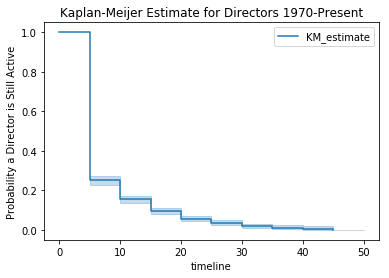

In [24]:
# Analyzing the Survival Rate of Directors

# Fitting KM estimates for directors
kmf = KaplanMeierFitter()
kmf.fit(durations = dirSurvDF.duration, event_observed = dirSurvDF.ended)

# Event Table for directors
print("KaplanMeierFitter event table")
kmf.event_table

# Survival Function for directors
print("Survival Function: Probabilities for a director's career lasting longer than time T")
print("Calculated with 'kmf.survival_function_':")
round(kmf.survival_function_,2)
print("")
print("Median Career Length:", kmf.median_, "years")
print("")

# Plot of Survival Function for directors
kmf.plot()
plt.title("Kaplan-Meijer Estimate for Directors 1970-Present")
plt.ylabel("Probability a Director is Still Active")
plt.show()


<a id='discussing_directors'></a>

<h5>Lifespan of Directors: Results and Discussion of Fitting and Estimates</h5>
<a href='#toc'>Return to TOC</a>

<b>Event Table for Directors: Contents and Meaning</b>

The event table for directors is displayed above. Except for the specific number, the default structure of the event table is the same for any type of event. The time intervals on the left (labeled <i>event_at</i>) represent the range of years (0-45) covered by the careers of all directors active sometime between 1970 to the present. In this analysis, 0 years is the starting point for all 1867 directors. Of these, 249 were (right) <i>censored</i> -- they started in 2015 and there is no way to know whether they will make it to the next 5 year interval or not (since that's in the future). In the same vein, none of these directors or any of the other directors "officially" dropped out at the beginning. Consequently, the number of <i>observed</i> events is 0 (I labeled this state as 'ended' in the code). So, at this point, the probability of making it to the next time interval (i.e. the event_at = '5.0') is:

    S(0) = (at_risk(0) - observed(0))/at_risk(0) = (1867 - 0)/1867 = 1.00
    
At the next time interval '5', the number at risk equals:

    at_risk(5) = at_risk(0) - removed(0) = 1867 - 249 = 1618
    
Using the same logic, the probability of making it from time interval '0' to time interval '5' is:

    S(5) = (at_risk(5) - observed(5)/at_risk(5) = (1618 - 1213)/1618 = .25
    
The chances of making it from '5' to '10'? Well,

    at_risk(10) = at_risk(5) - removed(5) = 1618 - 1213 = 405
    
So, the probability of making it from time interval '5' to time interval '10' is:

    S(10) = (at_risk(10) - observed(10)/at_risk(10) = (405 - 155)/405 = .62
    
and so on with the other intervals.

While these probabilities are important, they only tell us the chance of being active or alive from one time interval to the next. This isn't the survival probability. The survival probability answers the question: what's the chance of being active or alive from a given time period or interval forward.  In our parlance, what's the chance that a director will have a career that is at least 5 years (or 5 years or longer), at least 10 years, at least 15 years, etc.? 

As noted earlier, in the Kaplan Meier estimate the answer is provided by the cross product of all the individual probabilities up to and including the time interval of interest, i.e. 

    S(t)=∏(ni−di)/ni
    
Here, if we want to know the probability of having a directing career that lasts longer than 5 years, the answer would be:

    S(t>5) = S(0) * S(5) = 1.00 * .25 = .25
    
The probability of a career longer than 10 years, would be:

    S(t>10) = S(0) * S(5) * S(10) = 1.00 * .25 * .62 = .155
    
And so on.

Luckily, we don't have to do this by hand.  The 'survival_function_' method does this for us. When combined with a plot of the survival function, they provide a clear image of the overall structure of the survival rates.

<b>Survival Function and Plot for Directors</b>

What's clear from the 'survival function' probabilities along with the step-function chart of the distribution is that being a Bollywood director is usually a shortlived career with the majority of the careers ending at 5 years or less. As the median indicates this is what happens to 50% of the directors. The total distribution indicates it's also true for 75% of the directors. Additionally, of the total that start, 15% make it past 10 years, 10% past 15 years, etc. If these were age survival rates for the population of a country or marriage survival rates, they'd obviously be catastrophic. Fortunately, they aren't.


<b>Directors with Very Long Careers</b>

What leads to a very long career among directors? Take a look at the directors with very long running careers (35+ years).

In [25]:
print("Directors with very long running careers of 35+ years")
print("")
for name in dirY5Dict.keys():
    dirLength = dirY5Dict[name]['cLength']
    if dirLength >= 35:
        print(name, dirY5Dict[name])
        print("")

Directors with very long running careers of 35+ years

Rajkumar Kohli {'counts': {1970: 1, 1975: 1, 1980: 3, 1985: 4, 1990: 2, 1995: 1, 2000: 1, 2005: 0, 2010: 0, 2015: 0}, 'movieCnt': 13, 'startYr': 1970, 'endYr': 2005, 'ended': 1, 'cLength': 35}

Subhash Ghai {'counts': {1970: 0, 1975: 2, 1980: 4, 1985: 2, 1990: 2, 1995: 2, 2000: 1, 2005: 3, 2010: 1, 2015: 0}, 'movieCnt': 17, 'startYr': 1975, 'endYr': 2015, 'ended': 1, 'cLength': 40}

Anil Sharma {'counts': {1970: 0, 1975: 0, 1980: 1, 1985: 1, 1990: 2, 1995: 2, 2000: 3, 2005: 1, 2010: 2, 2015: 1}, 'movieCnt': 13, 'startYr': 1980, 'endYr': 2020, 'ended': 0, 'cLength': 40}

Harmesh Malhotra {'counts': {1970: 1, 1975: 3, 1980: 3, 1985: 4, 1990: 4, 1995: 2, 2000: 1, 2005: 0, 2010: 0, 2015: 0}, 'movieCnt': 18, 'startYr': 1970, 'endYr': 2005, 'ended': 1, 'cLength': 35}

Yash Chopra {'counts': {1970: 2, 1975: 3, 1980: 2, 1985: 3, 1990: 2, 1995: 1, 2000: 1, 2005: 0, 2010: 1, 2015: 0}, 'movieCnt': 15, 'startYr': 1970, 'endYr': 2005, 'ended': 

There are 6 directors with careers longer than 35 years. No way to know how or why they lasted that long solely from the data provided here. However, it appears that being one of the more prolific directors in terms of total movies doesn't assure longevity. If you look at those directors with the longest careers, none of them is among the top 5 in terms of total movies and only one of them (Shyam Benegal) was in the top 10. Basically, the pattern they display is a slow steady stream of a few movies every 5 years. Answering the question of how they manage or generate this pattern requires a wider variety of data than provided in the Bollywood listings.

What about starring cast members? As an aggregate, do their careers reflect the same patterns as directors? As the analysis below indicates, the survival rates are somewhat better. Yet, there's still a steep decline after year 5.   

<a id='fitting_cast'></a>

<h5>Lifespan of Starring Cast: Fitting and Estimation</h5>
<a href='#toc'>Return to TOC</a>

<lifelines.KaplanMeierFitter: fitted with 3336 observations, 979 censored>

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,622,0,622,3336,3336
5.0,1844,1844,0,0,2714
10.0,458,269,189,0,870
15.0,194,126,68,0,412
20.0,106,54,52,0,218
25.0,45,32,13,0,112
30.0,33,20,13,0,67
35.0,13,9,4,0,34
40.0,10,2,8,0,21


Survival Probabilities for a starring cast member's career lasting longer than T
Calculated with 'kmf.survival_function_':
          KM_estimate
timeline             
0.0              1.00
5.0              0.32
10.0             0.22
15.0             0.15
20.0             0.12
25.0             0.08
30.0             0.06
35.0             0.04
40.0             0.04
45.0             0.04
50.0             0.04

Median Career Length: 5.0 years



Text(0.5, 1.0, 'Kaplan-Meijer Estimate for Cast Members 1970-Present')

Text(0, 0.5, 'Probability a Cast Members is Still Active')

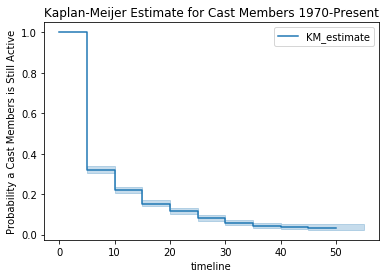

In [26]:
# Survival probabilities for starring cast members in Bollywood movies 1970 to present

# fitting KM estimates
kmf = KaplanMeierFitter()
kmf.fit(durations = castSurvDF.duration, event_observed = castSurvDF.ended)
kmf.event_table

# calculating Survival Function
print("Survival Probabilities for a starring cast member's career lasting longer than T")
print("Calculated with 'kmf.survival_function_':")
print(round(kmf.survival_function_,2))
print("")
print("Median Career Length:", kmf.median_, "years")
print("")

# plot of Survival Function
kmf.plot()
plt.title("Kaplan-Meijer Estimate for Cast Members 1970-Present")
plt.ylabel("Probability a Cast Members is Still Active")
plt.show()

<a id='discussing_cast'></a>

<h5>Lifespan of Starring Cast: Results and Discussion of Fitting and Estimation</h5>
<a href='#toc'>Return to TOC</a>

While the median length of a starring cast member's career is still 5 years (or less), the dropout rates are not quite as drastic as they are for directors. Instead of the .25 survival rate after year 5, it's .35. For the rest of the time intervals after 5 years, the decline is less steep than it is for directors and bottoms out at .4 with handful of actors having careers of 50+ years (indicating they are still active).

<b>Starring Cast with Very Long Careers</b>

Whose included among the handful of actors with very long careers? The answer is below:

In [27]:
print("Actors with careers of 50+ years")
print("")
for name in castY5Dict.keys():
    careerLength = castY5Dict[name]['cLength']
    if careerLength > 45:
        print(name, castY5Dict[name])
        print("")

Actors with careers of 50+ years

Rishi Kapoor {'counts': {1970: 3, 1975: 16, 1980: 16, 1985: 12, 1990: 25, 1995: 7, 2000: 7, 2005: 12, 2010: 12, 2015: 7}, 'movieCnt': 117, 'startYr': 1970, 'endYr': 2020, 'ended': 0, 'cLength': 50}

Amitabh Bachchan {'counts': {1970: 20, 1975: 28, 1980: 22, 1985: 10, 1990: 8, 1995: 7, 2000: 18, 2005: 26, 2010: 9, 2015: 8}, 'movieCnt': 156, 'startYr': 1970, 'endYr': 2020, 'ended': 0, 'cLength': 50}

Shabana Azmi {'counts': {1970: 4, 1975: 14, 1980: 32, 1985: 9, 1990: 7, 1995: 4, 2000: 4, 2005: 6, 2010: 2, 2015: 3}, 'movieCnt': 85, 'startYr': 1970, 'endYr': 2020, 'ended': 0, 'cLength': 50}

Hema Malini {'counts': {1970: 22, 1975: 30, 1980: 26, 1985: 15, 1990: 2, 1995: 4, 2000: 3, 2005: 1, 2010: 3, 2015: 1}, 'movieCnt': 107, 'startYr': 1970, 'endYr': 2020, 'ended': 0, 'cLength': 50}

Dharmendra {'counts': {1970: 28, 1975: 22, 1980: 26, 1985: 22, 1990: 21, 1995: 16, 2000: 5, 2005: 4, 2010: 4, 2015: 2}, 'movieCnt': 150, 'startYr': 1970, 'endYr': 2020, 'ende

Unlike directors, 2 out of the 5 actors (Dharmendra and Amitabh Bachchan) are among the top 5 most prolific actors, and another (Rishi Kapoor) is in the top 10. Only, Shabana Azmi is out of the top 20. So, being prolific may be necessary but it certainly isn't sufficient.  If there's any pattern here, it's the case that most of these actors were prolific for 20+ years followed by diminished activity for another 20+ years. The major exception to the pattern was Bachchan's resurgence in the 2000-2010 time frames (mentioned earlier), although his activity has slowed since then.

<a id='fitting_genre'></a>

<h5>Lifespan of Genre: Results and Discussion of Fitting and Estimation</h5>
<a href='#toc'>Return to TOC</a>

The final set of survival probabilities deal with the lifespan of genre. From earlier analysis we already know that among the 107 genre that have been used to describe movies over the 50 year time period since 1970, a small group of less than 10 genre account for the thematic tags or labels applied to most of the movies. So again, what we would expect to see is a substantial drop off in survival rates after the first 5 years but a somewhat persistant rate after 5 years (because of the persistent core). The actual results shown below support this expectation.

<lifelines.KaplanMeierFitter: fitted with 107 observations, 42 censored>

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,19,0,19,107,107
5.0,57,57,0,0,88
10.0,13,4,9,0,31
15.0,4,2,2,0,18
20.0,2,0,2,0,14
25.0,1,0,1,0,12
45.0,3,2,1,0,11
50.0,8,0,8,0,8


Survival Probabilities for a genre's usage lasting longer than 0, 5, and 10 years
Calculated with 'kmf.predict([0, 5, 10])':
0     1.00
5     0.35
10    0.31
Name: KM_estimate, dtype: float64

Survival Probabilities for a genre's usage lasting longer than T
Calculated with 'kmf.survival_function_':
          KM_estimate
timeline             
0.0              1.00
5.0              0.35
10.0             0.31
15.0             0.27
20.0             0.27
25.0             0.27
45.0             0.22
50.0             0.22
Median Career Length: 5.0 years



Text(0.5, 1.0, 'Kaplan-Meijer Estimate for Genre 1970-Present')

Text(0, 0.5, 'Probability a Genre is Still Active')

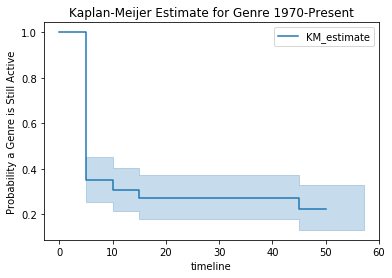

In [28]:
# Survival probabilities for genre used to tag Bollywood movies 1970 to present
genreSurvDF = createSurvivalDF(genreY5Dict)

kmf = KaplanMeierFitter()
kmf.fit(durations = genreSurvDF.duration, event_observed = genreSurvDF.ended)
kmf.event_table

print("Survival Probabilities for a genre's usage lasting longer than 0, 5, and 10 years")
print("Calculated with 'kmf.predict([0, 5, 10])':")
print(round(kmf.predict([0, 5, 10]),2))
print("")
print("Survival Probabilities for a genre's usage lasting longer than T")
print("Calculated with 'kmf.survival_function_':")
print(round(kmf.survival_function_,2))
print("Median Career Length:", kmf.median_, "years")
print("")
kmf.plot()
plt.title("Kaplan-Meijer Estimate for Genre 1970-Present")
plt.ylabel("Probability a Genre is Still Active")
plt.show()

<a id='discussing_genre'></a>

<h5>Lifespan of Genre: Results and Discussion of Fitting and Estimation</h5>
<a href='#toc'>Return to TOC</a>

Like directors and actors, the average lifespan of the majority of genre is 5 years or less. However, unlike these other groups there rates stabilize after 15 years but eventually drop after 45. If we look at those genre that have enjoyed continued usage over time, it's the usual suspects. This time, instead of simply listing those with the longest overall longevity, I've provided a list of the genre lasting longer that each of the 5 year intervals from 15 years on.

In [29]:
print("Genre used for at least")

# note: this is really an inefficient way of doing this but it's a small list
for lngth in range(15,55,5):
    usageYrsList = []
    for name in genreY5Dict.keys():
        usageLength = genreY5Dict[name]['cLength']
        if usageLength >= lngth:
            usageYrsList = usageYrsList +[name]
    print(lngth, "years,", "includes", len(usageYrsList), "genre", usageYrsList)
    print("")

Genre used for at least
15 years, includes 18 genre ['Sports', 'Romantic', 'Political', 'Comedy', 'Psychological', 'Drama', 'History', 'Horror', 'War', 'Action', 'Fantasy', 'Musical', 'Crime', 'Romance', 'Thriller', 'Family', 'Erotic', 'Adventure']

20 years, includes 14 genre ['Sports', 'Romantic', 'Comedy', 'Drama', 'Horror', 'War', 'Action', 'Fantasy', 'Musical', 'Crime', 'Romance', 'Thriller', 'Family', 'Erotic']

25 years, includes 12 genre ['Romantic', 'Comedy', 'Drama', 'Horror', 'War', 'Action', 'Fantasy', 'Musical', 'Crime', 'Romance', 'Thriller', 'Family']

30 years, includes 11 genre ['Romantic', 'Comedy', 'Drama', 'Horror', 'Action', 'Fantasy', 'Musical', 'Crime', 'Romance', 'Thriller', 'Family']

35 years, includes 11 genre ['Romantic', 'Comedy', 'Drama', 'Horror', 'Action', 'Fantasy', 'Musical', 'Crime', 'Romance', 'Thriller', 'Family']

40 years, includes 11 genre ['Romantic', 'Comedy', 'Drama', 'Horror', 'Action', 'Fantasy', 'Musical', 'Crime', 'Romance', 'Thriller', 'F

<b>Long Lasting Genre</b>

During this 35 year span 11-12 genre have persisted throughout with 8 lasting 50+ years. Actually, the counts are probably 10-11 and 7 since the 'Romantic' and 'Romance' genres are probably the same with the term 'Romance' dominating.

The thing about genre is that unlike people they can come back from the dead. There's nothing that keeps marketing groups from resurrecting old terms, especially really generic ones that seems timeless. So, for instance, you might see a term like 'Family' appearing again, but you're not likely to see a tag like 'Mythology' anytime soon (even though it was used to describe most of the movies in the very early years of Bollywood).

<a id='closing'></a>

<h3>Closing Comments and Next Phase</h3>
<a href='#toc'>Return to TOC</a>

This has been a brief (he say's sarcastically) 50 page statistical overview of the life and times of directors, starring cast members, and genre for Bollywood movies from 1970 to the present. For the most part the statistical overview has looked at various counts by years for each of these entities either in the aggregate or as individuals. The questions answered by the overview are primarily descriptive rather than explanatory - how many, how long, and who's at the top rather than why some many or few, why so long or short, or why at the top or the bottom. They also look at activity as an individual rather than a group endeavor,looking at who works with whom and why these group patterns might exist?
 
In the next phase of the analysis, I'm going focus primarily on the later questions by undertaking a social network analysis (SNA) based on the same data sets, although I may take a brief look at the IMDB data sets to see what the relationship is with the Bollywood movie listings in Wikipedia. If the IMDB data sets have fewer missing values, I way switch playing fields.